# Временные ряды

В реальной жизни часто возникают процессы, которые мы можем наблюдать с определенной частотой: курс валют каждую минуту, средняя температура каждый день, число посетителей торгового центра в месяц и т.д. Анализ таких данных, с одной стороны, может помочь решить ряд важных для науки и индустрии задач, а с другой стороны, требует особых подходов, поскольку теперь к явному набору признаков добавляются неявные - порядок и время появления этих данных.

Такие данные представляют собой так называемый *временной ряд*.

Итак, **временной ряд** - последовательность наблюдений, получаемая через *строго фиксированные промежутки времени*.

*Замечание.*
Вообще говоря, существуют задачи, где нужно анализировать наблюдения, получаемые через различные промежутки времени. Например, анализ производительности работника, выполняющего работы по нерегулярному графику (например, работающему 5 дней с двумя выходными). Такие данные тоже могут быть рассмотрены как временной ряд, к которому применяется некоторая дополнительная предобработка. В рамках данной лекции мы рассматриваем упрощённый случай, когда данные поступают с фиксированной частотой.


# Компоненты временного ряда

Таким образом, временной ряд можно представить в виде *бесконечной последовательности наблюдений (одномерных или многомерных)*:

$$x_t=(x_1, x_2, ..., x_n, ...)$$

Где $x_i$ - *число* или *вектор* измерений, полученный в момент времени с порядковым номером $i$.

Для простоты мы будем говорить о временных рядах, для которых $x_i \in R$, то есть рассматриваем одномерные наблюдения.

Любой временной ряд может включать следующий набор компонент:

1. **Основная часть** ($u_t$).
2. **Тренд** ($m_t$) - основная тенденция в динамике ряда (рост, падение).
3. **Сезонный эффект** или **сезонность** ($s_t$) - некоторый эффект, характерный для динамики ряда, и повторяющийся с известным периодом (неделя, месяц, год и т.д.).
4. **Выбросы** ($i_t$) - резкое изменение в динамике процесса, вызванное внешним воздействием (вспышка эпидемии, экономический кризис и т.д.).
4. **Остатки** или **ошибка** ($eps_t$) - случайная компонента временного ряда (об этом позже).


## Пример

В качестве примера давайте рассмотрим значения количества пассажиро-милей в США помесячно с 1996 по 2005 годы:

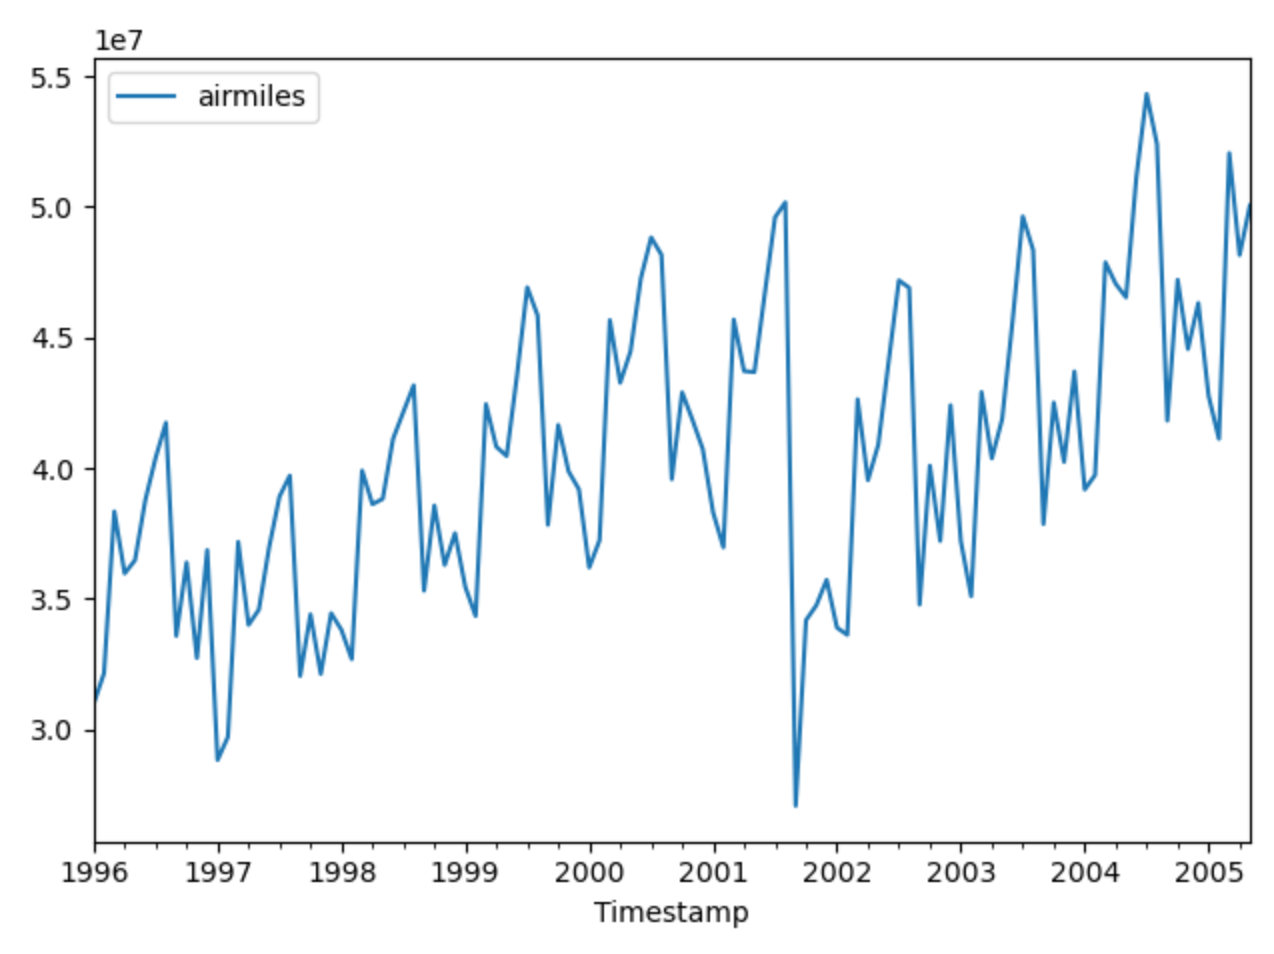

Нетрудно заметить, что данные ведут себя примерно одинаково в течение года (в начале и в конце года значение пассажиро-миль не такое большое - обычно все пассажиры летают недалеко, к родственникам на праздники; ближе к лету и в бархатный сезон (август-сентябрь) люди летают в отпуск на дальние расстояния; а весной и осенью объем перелетов примерно одинаков - это говорит о том, что люди находятся на работе и не так часто летают в это время). Это говорит о наличии **сезонной компоненты** с периодом сезонности 12 месяцев.

Кроме того количество пассажиро-милей растет. Полёты становятся доступнее, люди всё чаще летают на самолётах. Это говорит о том, что в данных присутствует **тренд** роста.

Так же можно явно видеть на графике **аномалию**: резкое падение пассажиро-милей во второй половине 2001 года. Это связано с событиями 11 сентября.

## Модели временного ряда. Аддитивная модель.

Таким образом, в общем виде ряд можно представить в виде функции, зависящей от каждой компоненты ряда:
$$x_t = F(m_t, s_t, i_t, u_t, eps_t)$$

В самом простом случае (который мы и будем рассматривать на лекции), временной ряд можно представить в виде некоторой суммы:

$$x_t = m_t + s_t + i_t + (u_t + eps_t)$$

Такая модель называется **аддитивной моделью временного ряда**.

Заметим, что сумму $(u_t+eps_t)$ называют так же *стационарной частью* временного ряда (об этом чуть позже).

Поскольку мы представили ряд в виде суммы, такую модель так же можно называть *аддитивной моделью временного ряда*.

# Декомпозиция временного ряда

Рассмотрим датасет с потреблением электроэнергии в мегаваттах за последние 10 лет некоторой американской компании. Датасет содержит значения суммарного потребления электроэнергии за каждый час.

Датасет доступен на платформе Kaggle: https://www.kaggle.com/robikscube/hourly-energy-consumption#AEP_hourly.csv

Для удобства мы заранее его скачали и загрузили на Google drive.

In [ ]:
from google.colab import output
! wget -O "AEP_hourly.csv" "https://drive.google.com/uc?id=1Iz8iV7fUl4WvDFXyctsVmuuYni7VqC5l&export=download"
output.clear()

In [ ]:
import datetime # Работа с датами
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams # Дополнительный модуль для построения графиков
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('AEP_hourly.csv', sep =',', parse_dates=['Datetime'], index_col='Datetime')
df.sort_index(inplace=True)
print(f"Количество измерений: {len(df)}")

Количество измерений: 121273


Ограничимся 30 000 наблюдений

In [ ]:
df = df.iloc[-30000:]
df.head(10)

AEP_MW
Datetime                    
2015-03-02 00:00:00  15867.0
2015-03-02 01:00:00  15444.0
2015-03-02 02:00:00  15307.0
2015-03-02 03:00:00  15328.0
2015-03-02 04:00:00  15373.0
2015-03-02 05:00:00  15689.0
2015-03-02 06:00:00  16724.0
2015-03-02 07:00:00  18158.0
2015-03-02 08:00:00  18652.0
2015-03-02 09:00:00  18654.0

Можно легко заметить, что данный временной ряд обладает сезонностью, также есть суточная сезонность (днем больше, ночью меньше).

<Axes: title={'center': 'Потребление энергии'}, xlabel='Datetime'>

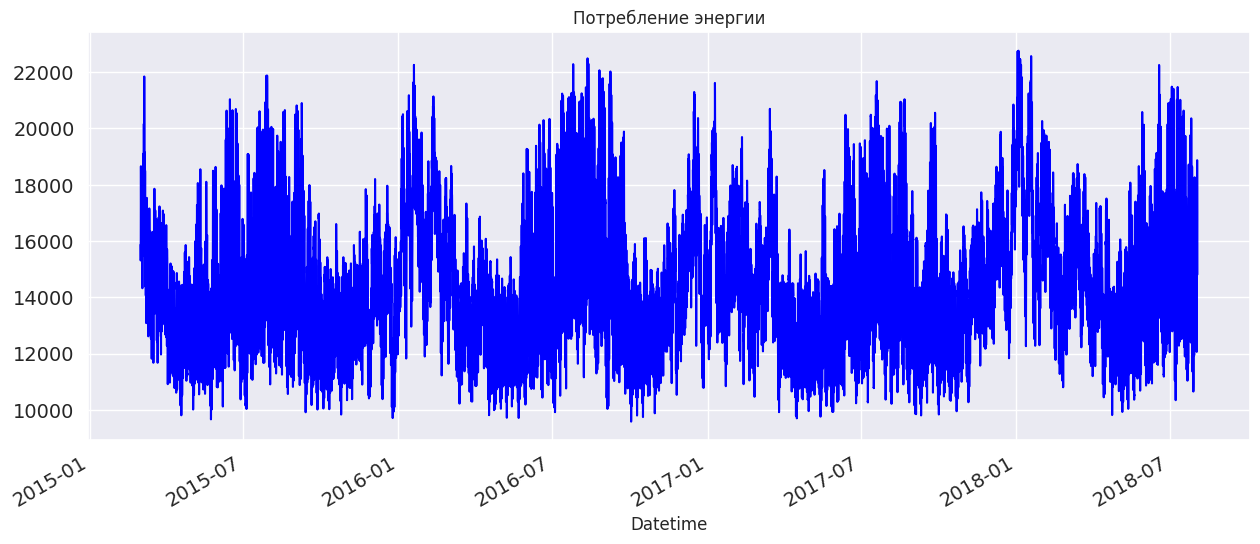

In [ ]:
df.AEP_MW.plot( figsize=(15,6),title= 'Потребление энергии', fontsize=14, color="blue")

Сгладить шум, чтобы убедиться в наличии сезонности, можно, например, при помощи так называемых *оконных функций*. Самым простым примером оконной функции является *скользящее среднее (moving average)* .

Скользящее среднее - это среднее значение измеренных показаний по некоторому окну. Его можно выразить следующей формулой:

$$ MA_m =  \frac{1} {m} \sum_{i=0}^{m-1} (x_{t-i}) = \frac{x_t + x_{t-1} + ... + x_{t-m+1}} {m}$$

Мы же воспользуемся **экспоненциальным взвешенным средним**.

*Экспоненциальное взвешенное среднее* - это способ аггрегирования данных при помощи следующей логики:

Если мы думаем, что наши данные слишком шумные, давайте рассматривать их усреднение по некоторому окну. Однако рассматривать обычное усреднение - немного неправильно, поскольку последние наблюдения, казалось бы, должны вносить больший вклад в формирование усреднённой величины, ведь мы рассматриваем именно временной ряд. Поэтому, в отличие от обычного среднего, мы действительно даём наблюдениям некоторые веса, которые экспоненциально убывают со временем.

Оказывается, такая логика реализуется при помощи следующей рекурсивной формулы:

$$ ema_{t+1} = \alpha⋅ema_t + (1-\alpha)⋅x_{t+1}$$

Где $ema_t$ - это значение экспоненциального взвешенного среднего на шаге $t$, а $x_t$ - наблюдение, сделанное на шаге $t$, а $\alpha$ - это специальный параметр, характеризующий скорость затухания весов.

В `pandas` экспоненциальное взвешенное среднее реализуется при помощи вызова функции `.ewm()`

Дефолтным аргументом этой функции служит размер окна.

[Подробнее о ema](https://www.youtube.com/watch?v=Fqge2HDH2Co)

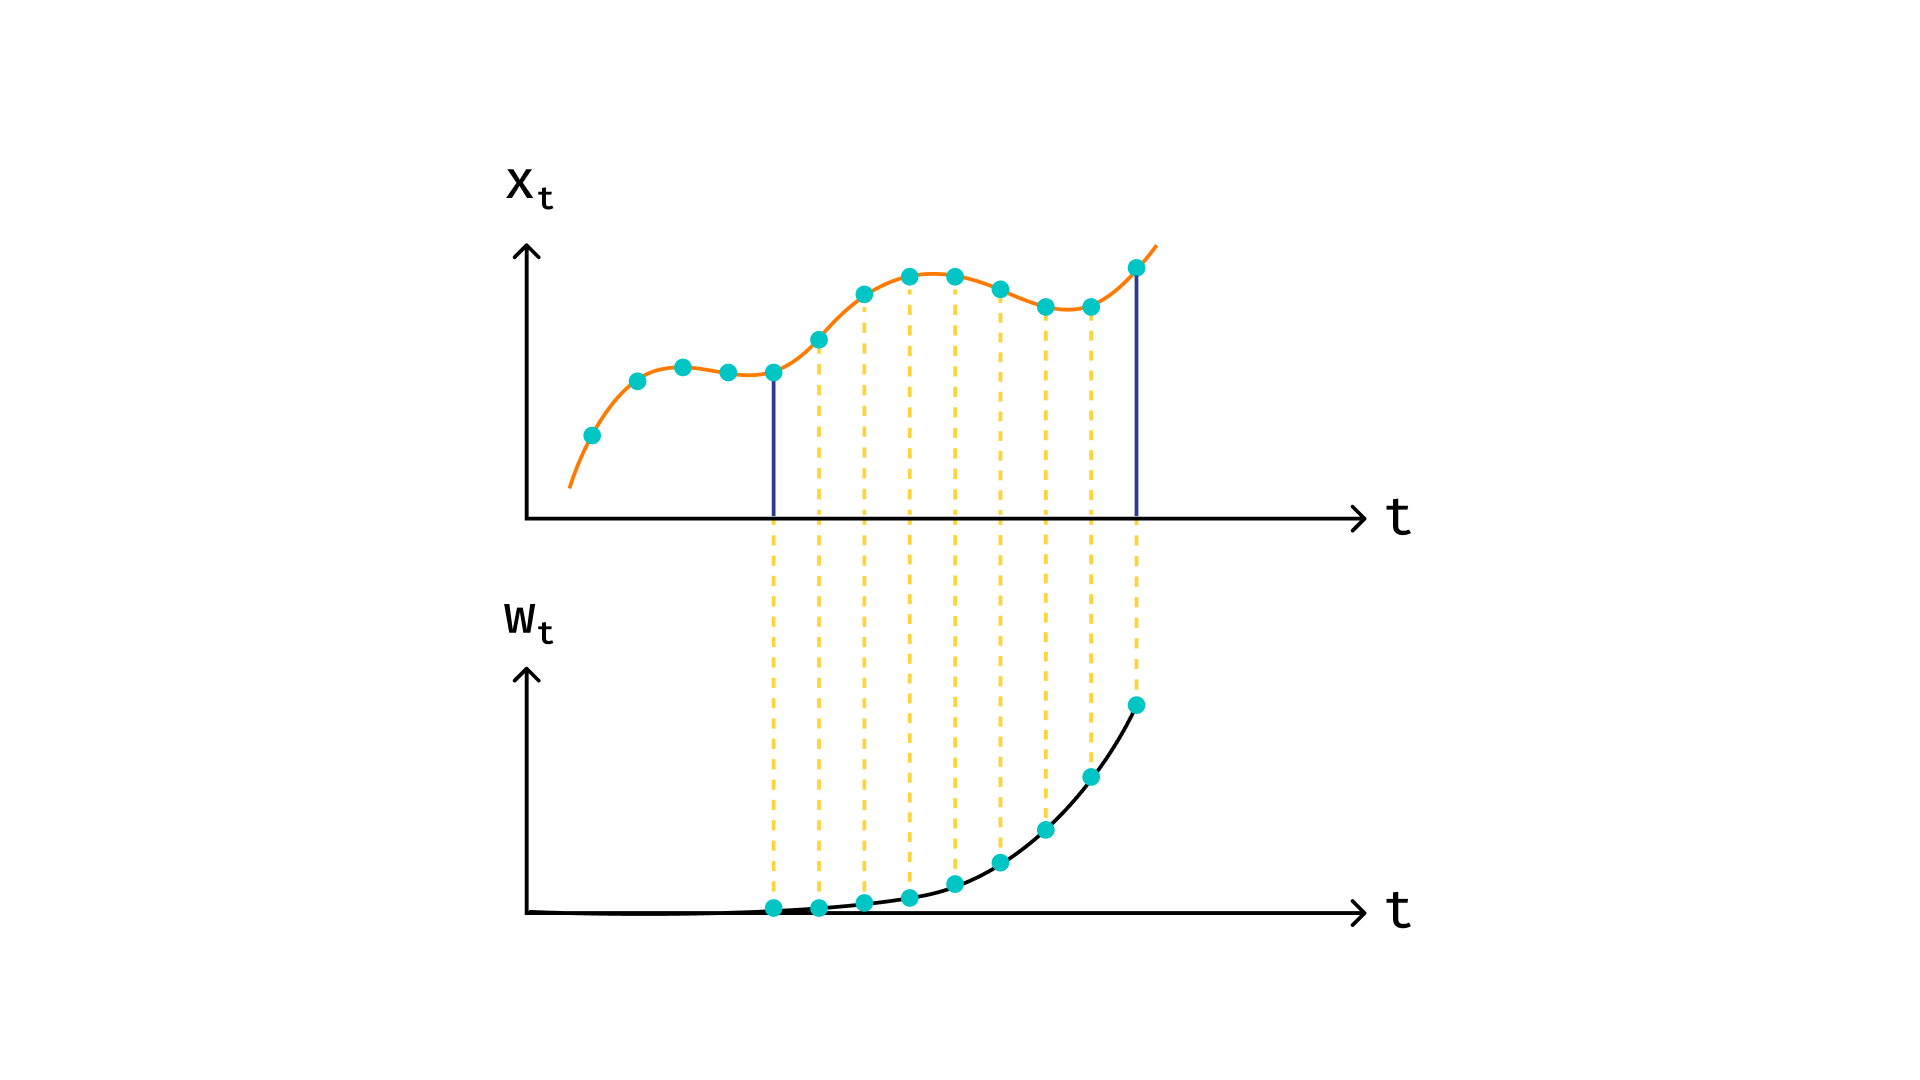

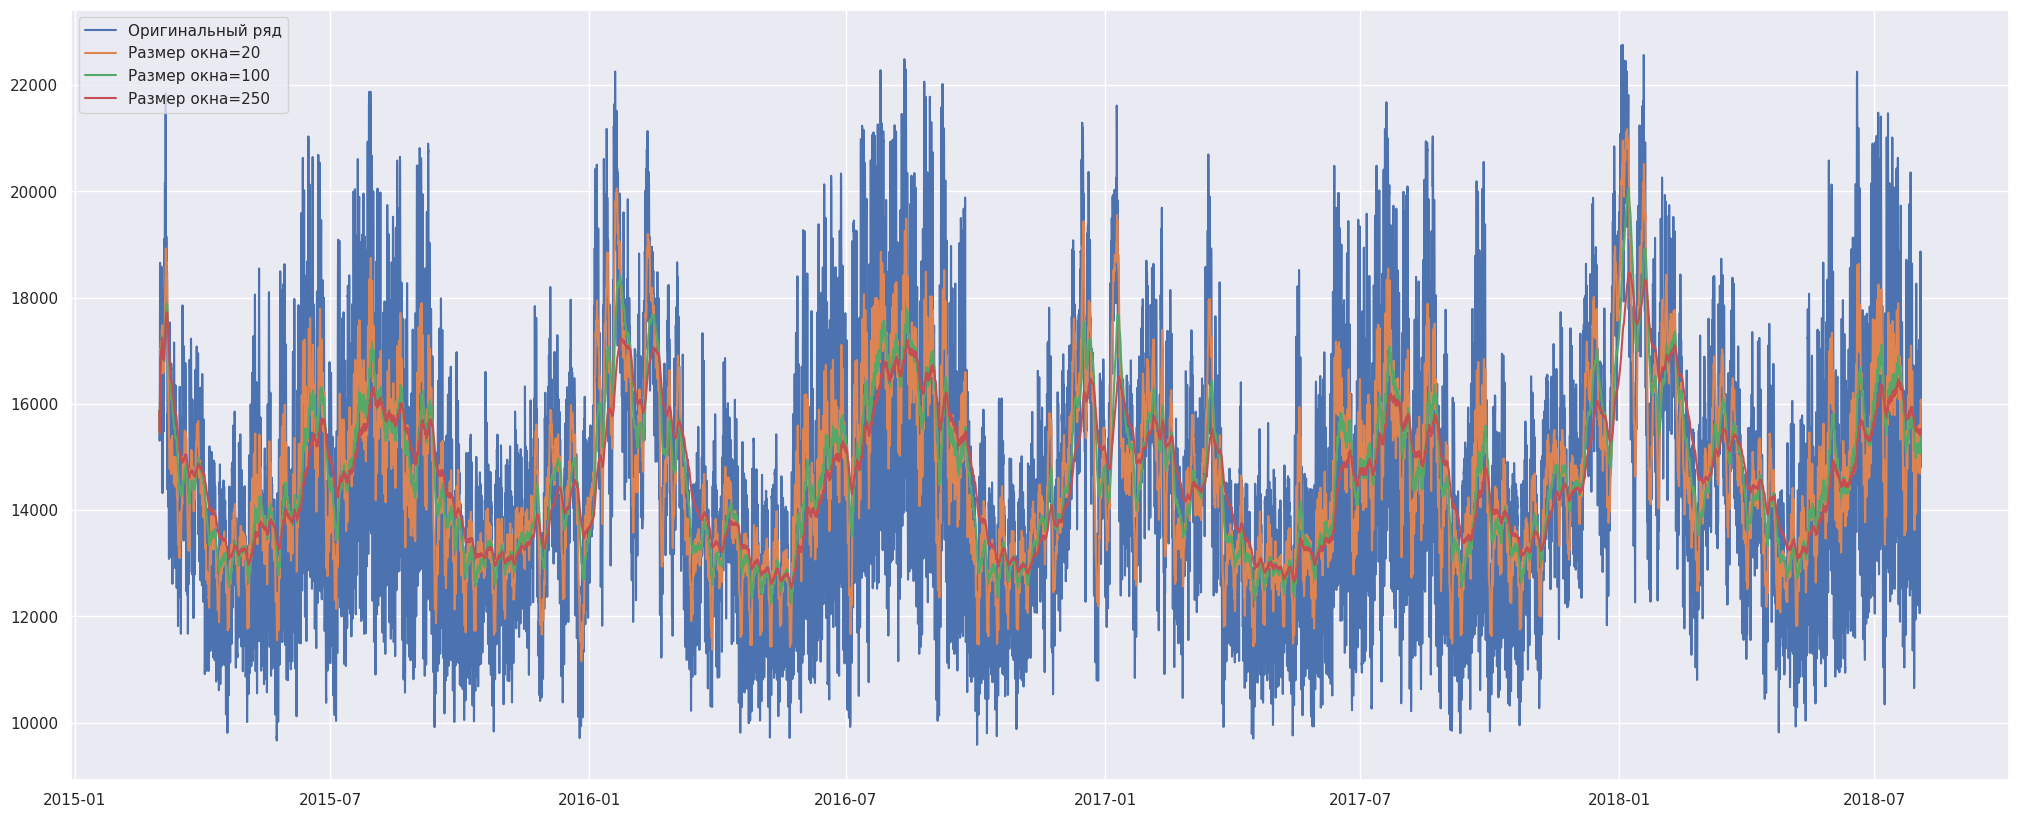

In [ ]:
df['ema_20'] = df.AEP_MW.ewm(20).mean()
df['ema_100'] = df.AEP_MW.ewm(100).mean()
df['ema_250'] = df.AEP_MW.ewm(250).mean()
plt.figure(figsize=(25,10))
plt.plot(df.AEP_MW, label='Оригинальный ряд')
plt.plot(df.ema_20, label='Размер окна=20')
plt.plot(df.ema_100, label='Размер окна=100')
plt.plot(df.ema_250, label='Размер окна=250')

plt.legend()

Но наблюдаемая нами здесь сезонность - глобальная, наблюдается на больших временных промежутках. Можно увидеть и более скромную по характерному времени сезонность - интерсуточную (проявляющуюся в рамках одних суток).

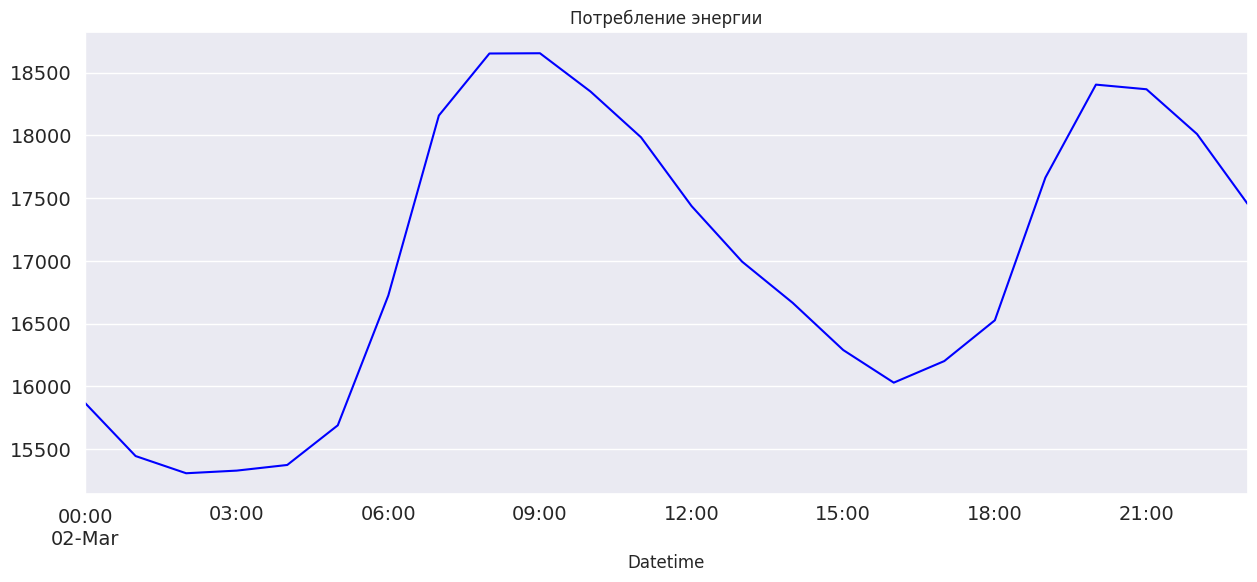

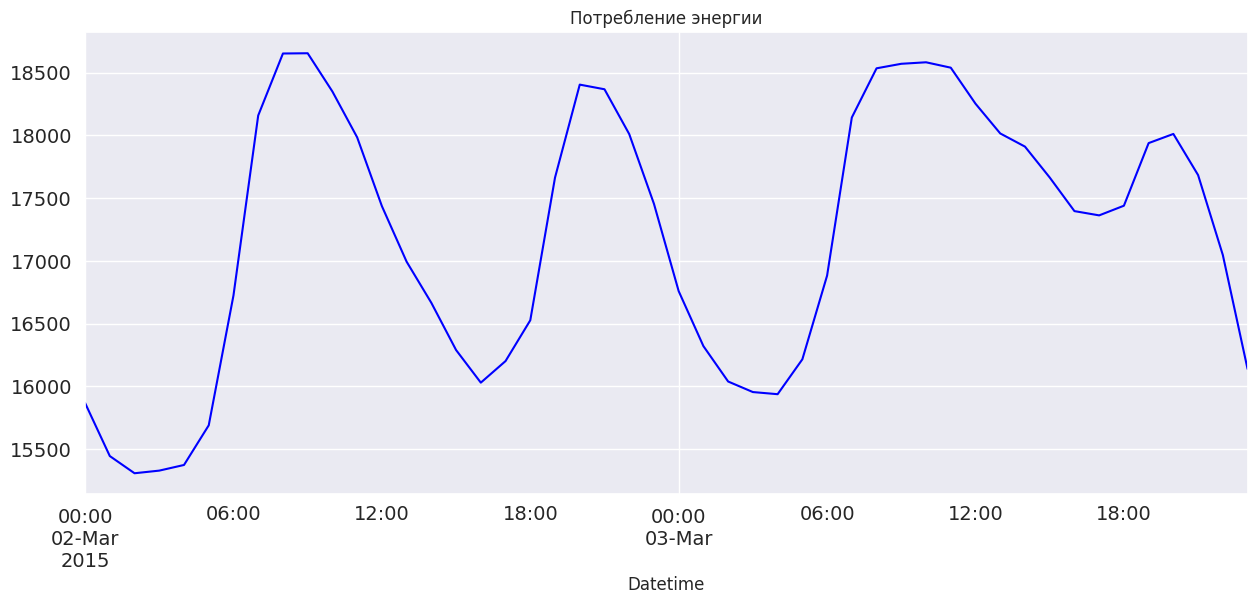

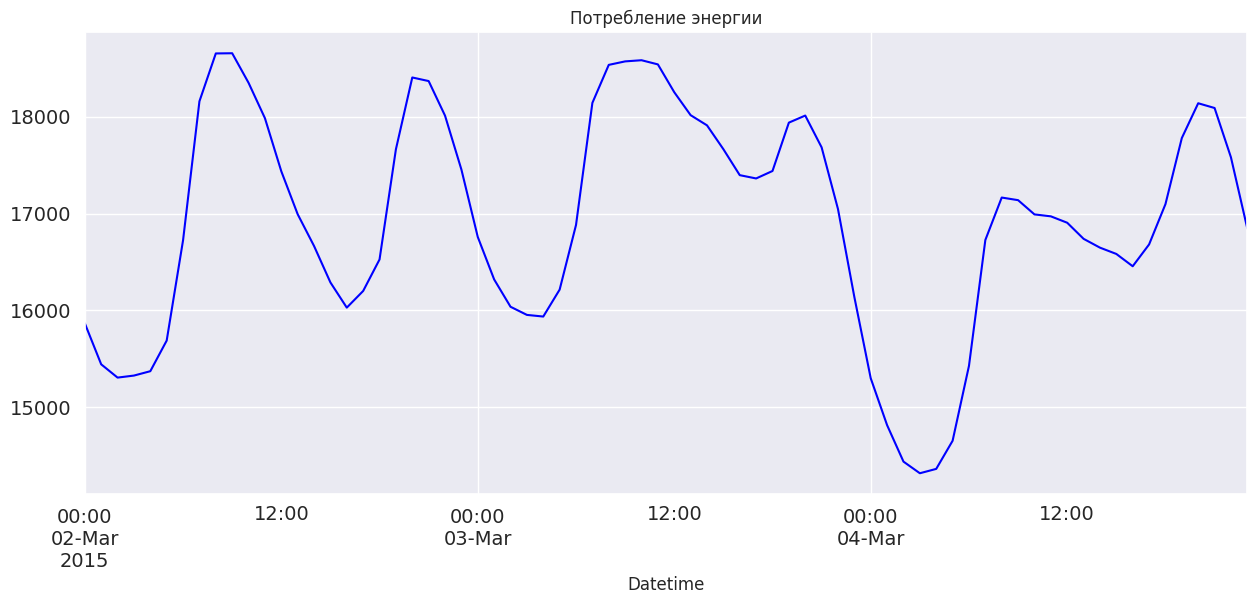

In [ ]:
for days in range(1, 4):
    df.iloc[:24 * days].AEP_MW.plot( figsize=(15,6),title= 'Потребление энергии', fontsize=14, color="blue")
    plt.show()

Мы уже знаем, что временной ряд раскладывается на отдельные компоненты. Нам будет проще прогнозировать будущие значения ряда, если мы будем работать по отдельности с каждой из компонент.

В нашей лекции мы рассматриваем только аддитивные модели, поэтому будем считать, что временной ряд представляется следующим образом:
$$x_t = m_t + s_t + i_t + (u_t + eps_t)$$

## Компоненты временного ряда. Реальный пример.

Рассмотрим проявление компонент временного ряда на реальном примере. Выделим сезонность, тренд и остатки.

### Сезонность

Выше мы убедились в существовании явления сезонности у приведённого набора данных визуально. Попробуем сделать это чуть более простым способом. Выделим ежемесячное потребление энергии в каждый год из имеющихся в датасете.

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
df['dow'] = df.index.dayofweek
df_pivot = pd.pivot_table(df, values = "AEP_MW", columns = "year", index = "month")
df.head(5)

AEP_MW        ema_20       ema_100       ema_250  year  \
Datetime                                                                       
2015-03-02 00:00:00  15867.0  15867.000000  15867.000000  15867.000000  2015   
2015-03-02 01:00:00  15444.0  15650.341463  15654.447761  15655.077844  2015   
2015-03-02 02:00:00  15307.0  15530.267248  15537.477542  15538.588411  2015   
2015-03-02 03:00:00  15328.0  15475.941765  15484.323944  15485.625638  2015   
2015-03-02 04:00:00  15373.0  15453.297048  15461.613882  15462.920311  2015   

                     month  hour  dow  
Datetime                               
2015-03-02 00:00:00      3     0    0  
2015-03-02 01:00:00      3     1    0  
2015-03-02 02:00:00      3     2    0  
2015-03-02 03:00:00      3     3    0  
2015-03-02 04:00:00      3     4    0

In [ ]:
df_pivot.head(5)

year           2015          2016          2017          2018
month                                                        
1               NaN  16760.747312  15566.197581  17594.875000
2               NaN  15895.386494  14665.684524  15276.663690
3      15127.254520  13687.551817  14572.872140  15112.578735
4      13132.133333  13205.677778  12888.327778  13639.244444
5      13750.818548  13042.350806  13100.915323  14117.005376

Компоненты сезонности изображены на графике.



<Axes: title={'center': 'Компонента сезонности'}, xlabel='month'>

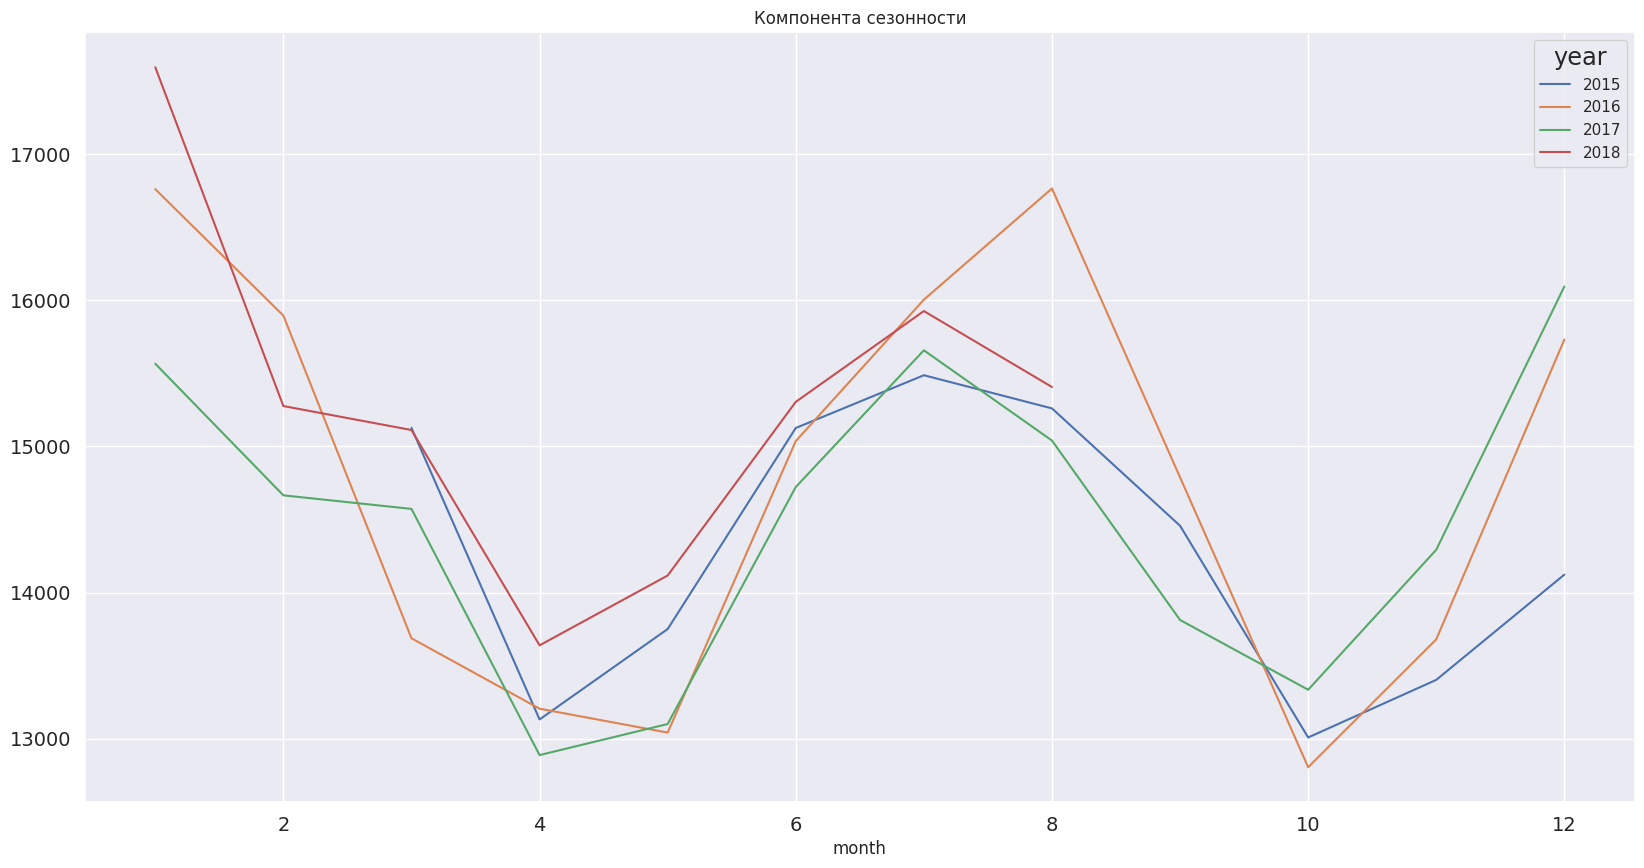

In [ ]:
plt.rcParams['legend.title_fontsize'] = 'x-large'

df_pivot.plot( figsize=(20, 10),title= 'Компонента сезонности', fontsize=14)

### Тренд

Тренд можно извлечь с помощью скользящей средней по исходному временному ряду.
Также тренд можно извлекать с помощью линейной регрессии.

Каждая точка на первом графике внизу - это среднее за последние 30 дней.
Следующая точка аналогично - среднее за следующие 30 дней.

Ниже, на втором графике линия начинается спустя некоторое время: сначала окно накапливается (24 * 30), потом начинается график.
На первом графике неправильно подобрали период, поэтому сезонность осталась.
Если возьмем 6 месяцев или 12 (второй график), то понимаем, что в данных есть тренд.

Для того чтобы исполнить эту задумку, мы воспользуемся функцией `.rolling`, которую вызовем от объекта `pd.DataFrame`. Эта функция формирует скользящее окно, по которому мы затем можем взять любые статистики. Мы возьмём среднее.

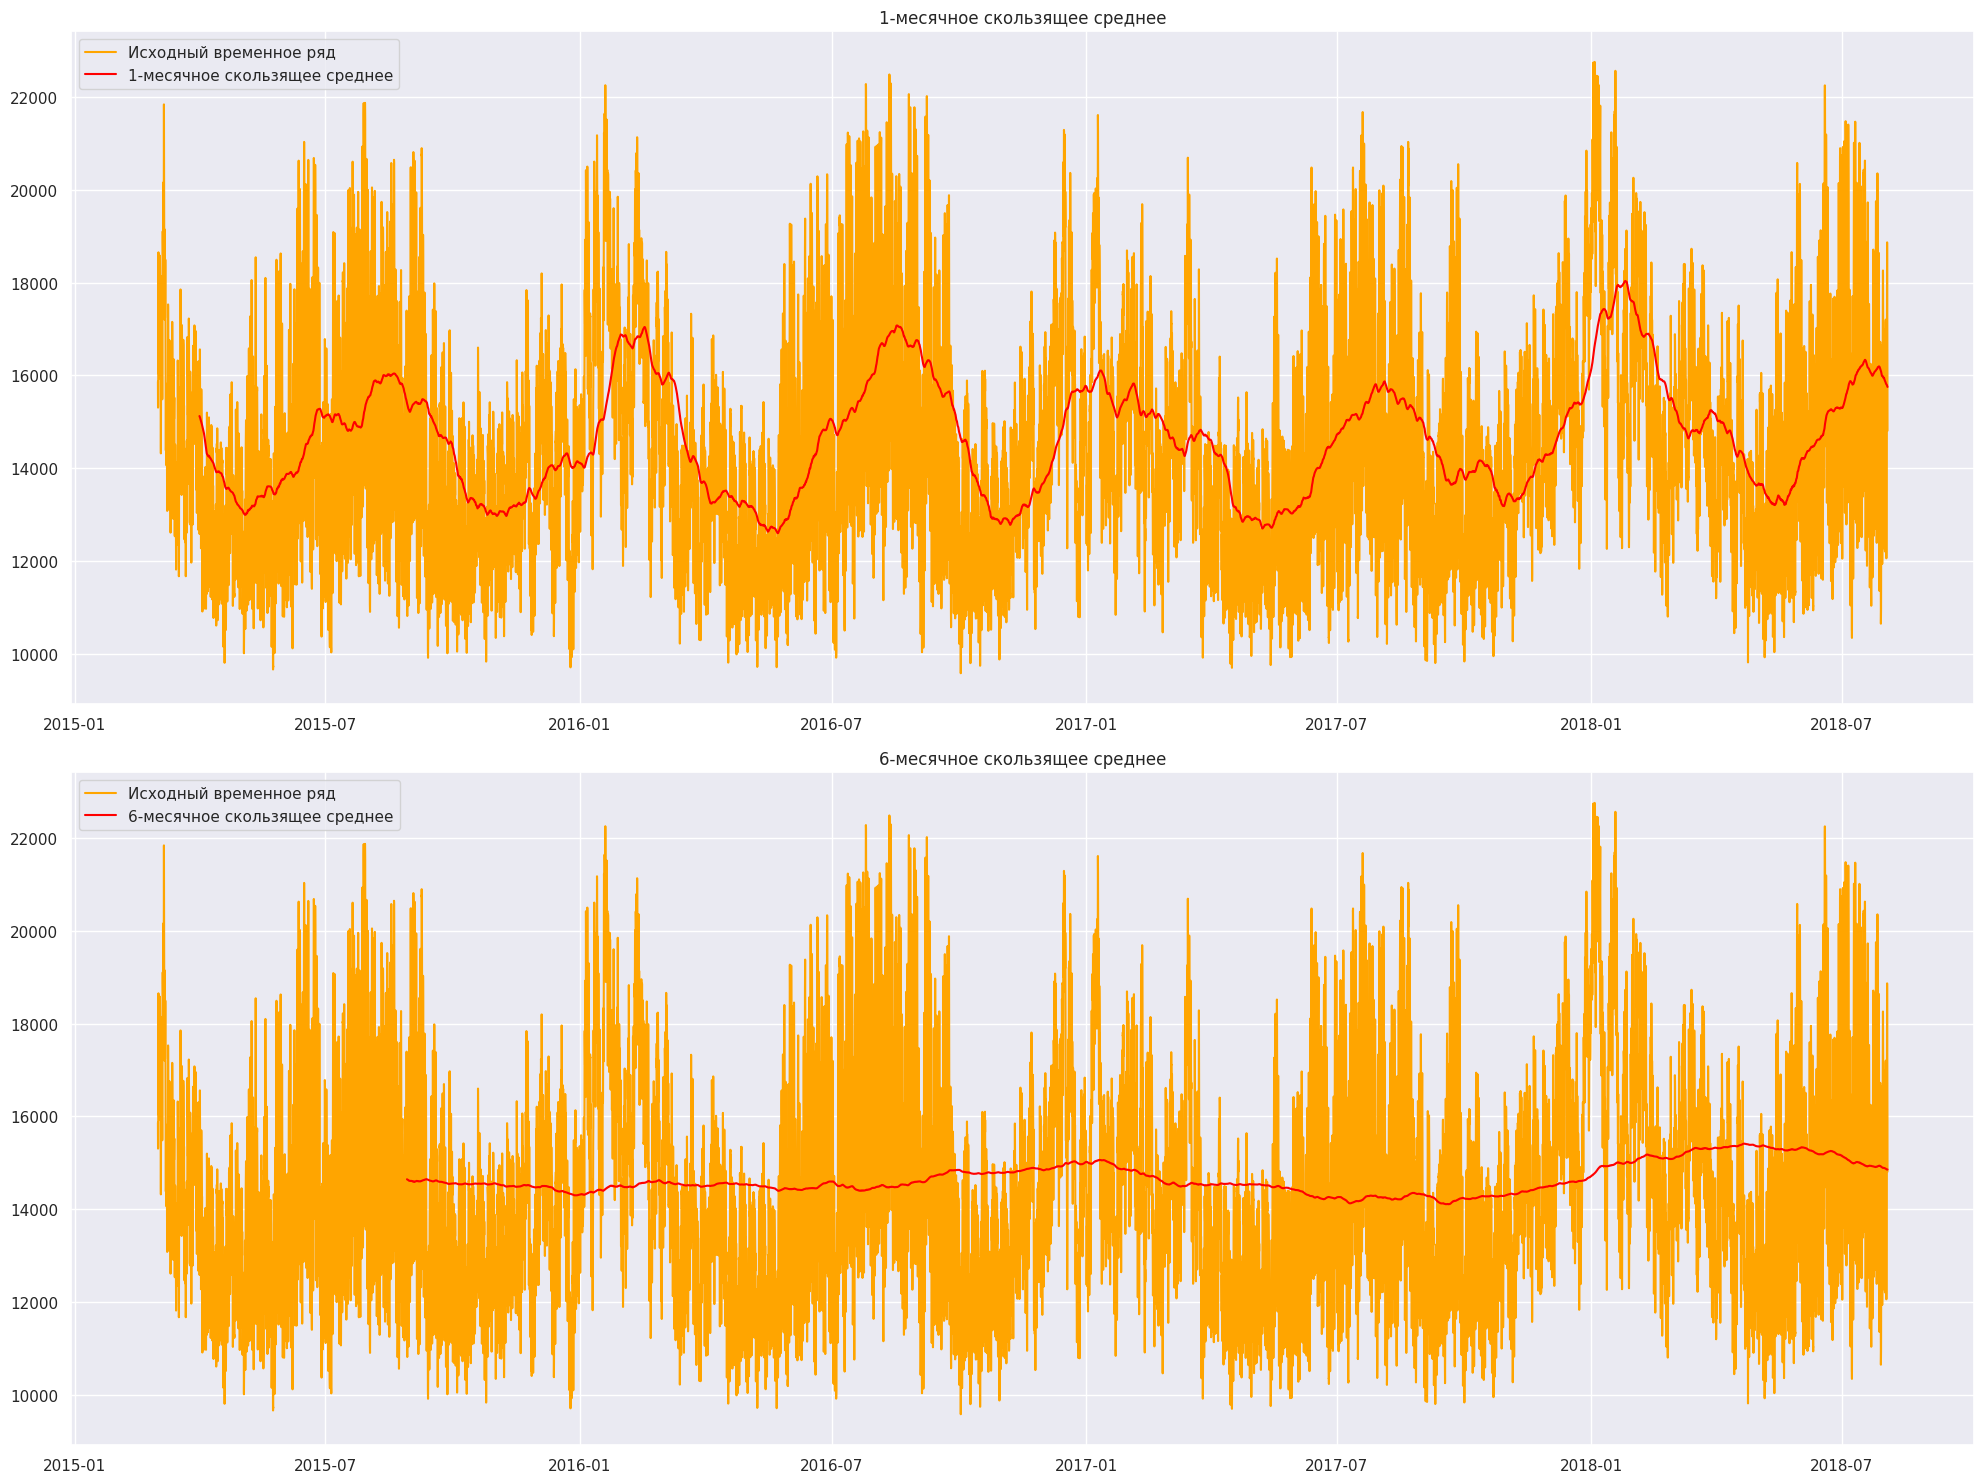

In [ ]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(20)
fig.set_figheight(15)

window = 24 * 30 # 30 дней

rolling_mean = df.AEP_MW.rolling(window=window).mean()
axes[0].plot(df.index, df.AEP_MW, label='Исходный временное ряд', color="orange")
axes[0].plot(df.index, rolling_mean, label='1-месячное скользящее среднее', color="red")
axes[0].set_title("1-месячное скользящее среднее")
axes[0].legend(loc='best')

window = 24 * 30 * 6 # 180 дней - полгода

rolling_mean = df.AEP_MW.rolling(window=window).mean()
axes[1].plot(df.index, df.AEP_MW, label='Исходный временное ряд', color="orange")
axes[1].plot(df.index, rolling_mean, label='6-месячное скользящее среднее', color="red")
axes[1].set_title("6-месячное скользящее среднее")
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

Для извлечения тренда нужно использовать окно `window` равное сезонности временного ряда.

Cезонность можно определить как визуально по графику, так и с помощью более экзотических методов рядов Фурье - https://anomaly.io/detect-seasonality-using-fourier-transform-r/index.html).

### Остатки

Остатки - это то, что осталось после удаления из исходного временного ряда компонент сезонности и тренда. Остатки должны напоминать белый шум. Далее поподробнее разберем, что такое белый шум.

#### Белый шум*
________________________________________
Под *шумом* мы будем понимать нежелательную добавку, возникающую случайным образом при записи нами информации в момент формирования временного ряда. То есть шум - это некоторая погрешность, с существованием которой нам приходится смириться. Шум плохо поддаётся моделированию даже в терминах случайных процессов. Шумы бывают разные, в зависимости от того, какими характеристиками он обладается. Например, в теории обработки сигналов, часто упомянается *розовый шум* - это шум, интенсивность которого падает с ростом частоты принимаемого сигнала. Мы же будем рассматривать базовый, но в некотором смысле наиболее сложный, случай - случай **белого шума**.

Вообще говоря, белый шум - это очень сложная математическая модель. Для того чтобы подробно разобраться в белом шуме, необходимо познакомиться с такими областями фундаментальной математики, как теория случайных процессов и обобщённые производные. Мы же определим белый шум не вполне корректным, но достаточным для понимания образом:

Белым шумом мы будем называть случайную величину, реализуемую в каждый момент времени, распределённую **нормально** по всему диапазону наблюдаемых значений. Белый шум должен быть также *стационарен*, то есть в каждый момент времени вероятность встретить некоторое его значение одинакова.
__________________________________________

Для начала создадим ряд гауссовского белого шума.

In [ ]:
import pandas as pd
from random import gauss, seed


seed(1)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)

In [ ]:
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


Реализация **гауссовского белого шума** выглядит следующим образом:

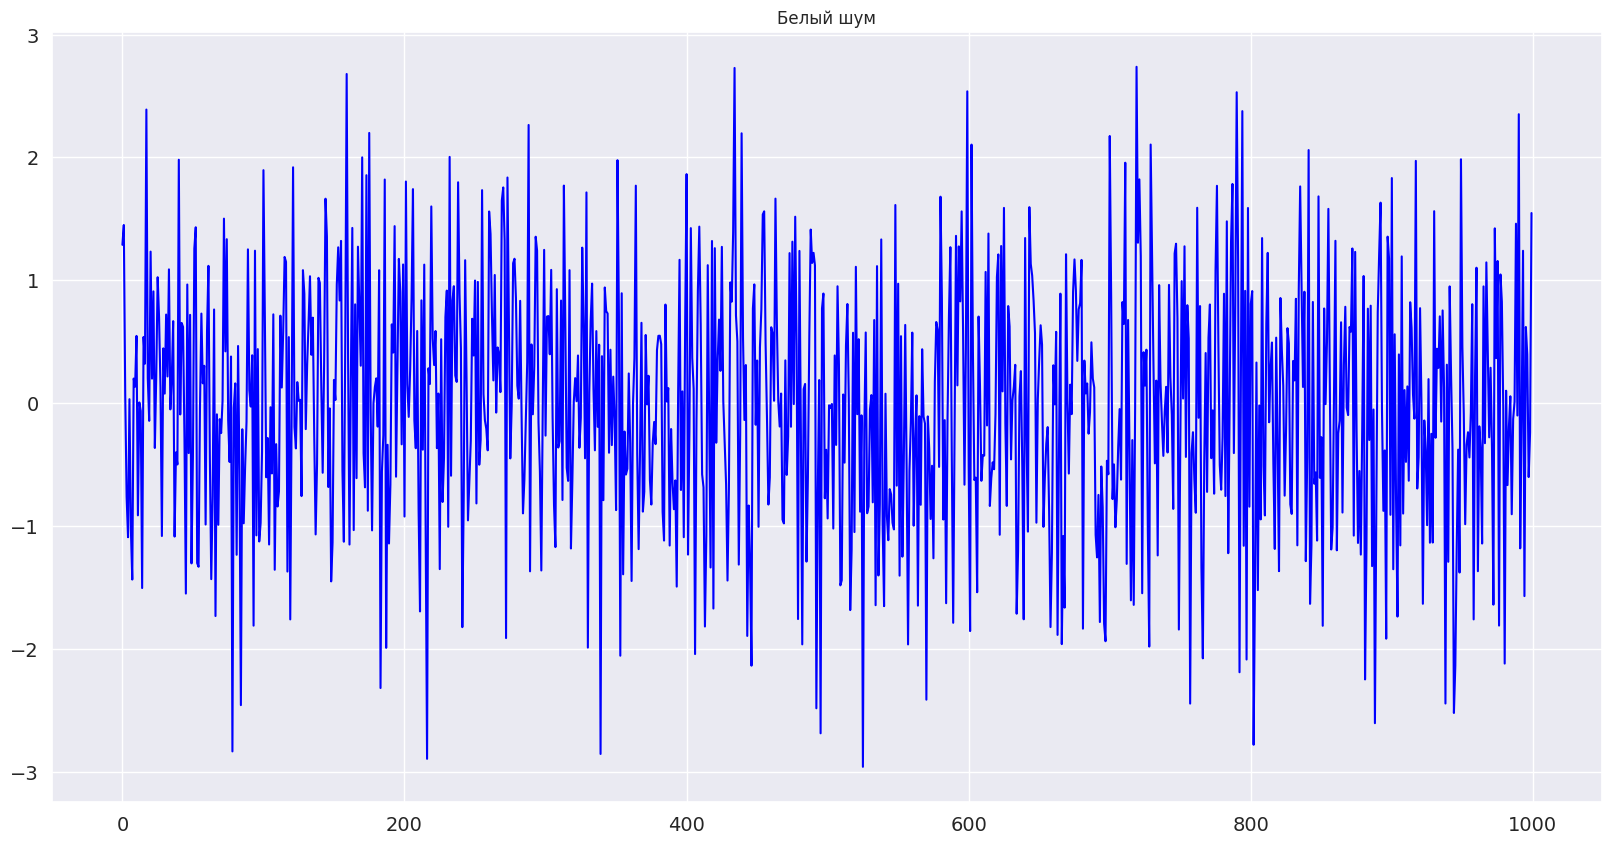

In [ ]:
series.plot( figsize=(20, 10),title= 'Белый шум', fontsize=14, color="blue")
plt.show()

Чтобы убедиться, что шум действительно гауссовский, нарисуем гистограмму.

<Axes: ylabel='Count'>

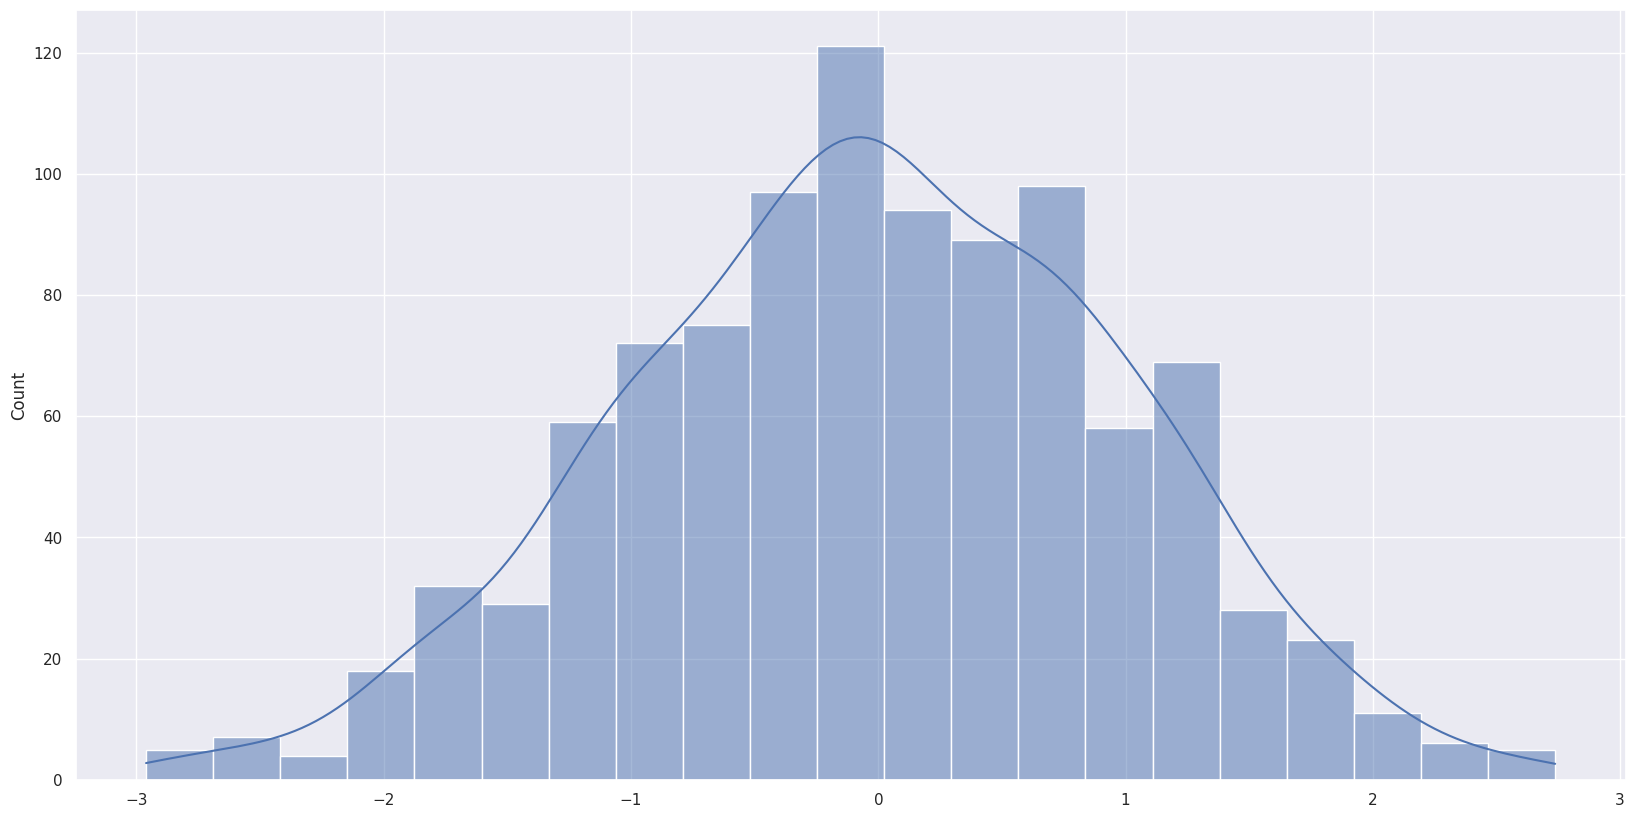

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(series, kde='True')

## Декомпозиция временного ряда. Реальный пример

Проведём теперь полноценную декомпозицию временного ряда при помощи статистических методов.

Для этого нам пригодится замечательная библиотека `statsmodels`, в которой реализовано очень много статистических инструментов, в том числе для работы с временными рядами.

Воспользуемся user-friendly модулем этой библиотеки, который называется `statsmodels.api`.

Для работы с временными рядами обратимся к модулю `statsmodels.api.tsa` (time series analisys), в котором реализована функция `seasonal_decompose`. В качестве аргументов этой функции мы передаём: `df.AEP_MW` - ряд для декомпозиции, `model='additive'` - модель декомпозиции и `freq= 24 * 30 * 6` - частота.

Text(0, 0.5, 'Residual')

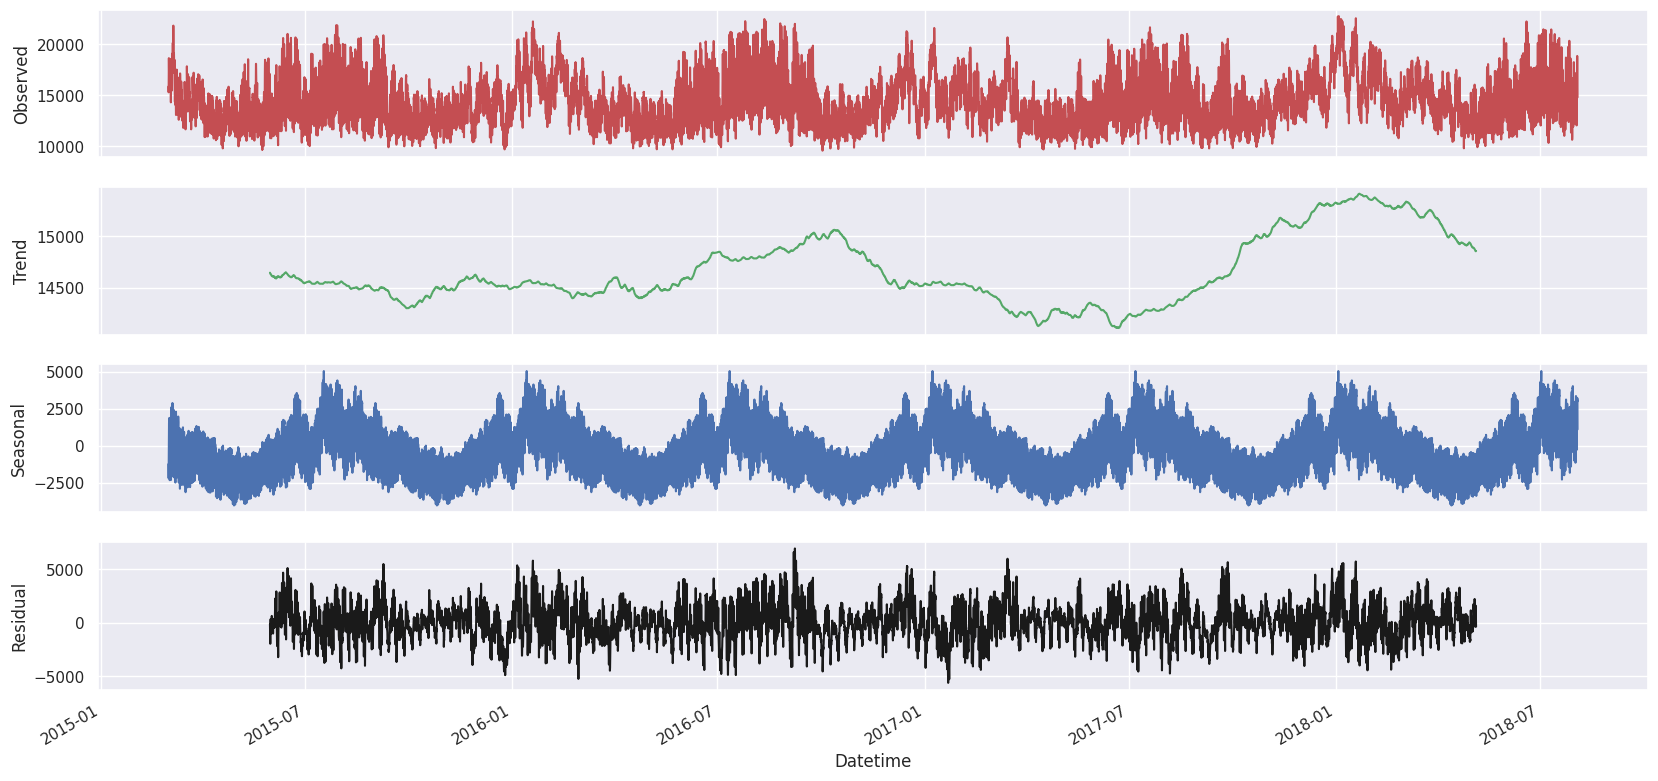

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (20, 10)

res = sm.tsa.seasonal_decompose(df.AEP_MW, model='additive', period= 24 * 30 * 6)
fig, axes = plt.subplots(4, 1, sharex=True)

res.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

Для лучшего понимания проделаем то же собственноручно. Нарисуем исходный временной ряд.

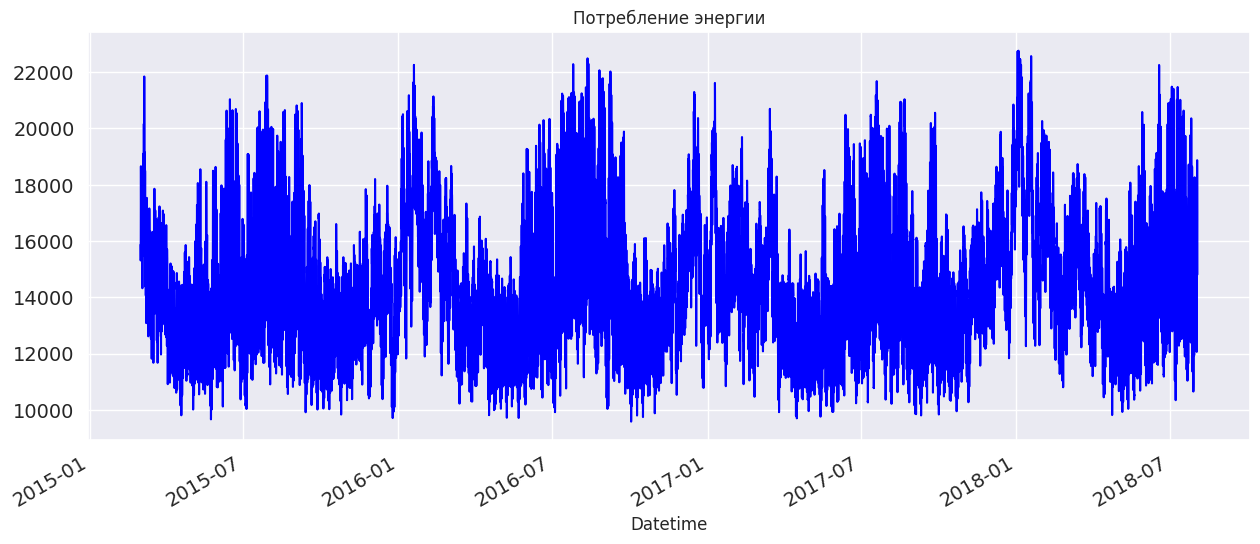

In [ ]:
df.AEP_MW.plot( figsize=(15,6),title= 'Потребление энергии', fontsize=14, color="blue")
plt.show()

### Посчитаем скользящие средние для определения тренда

Вновь воспользуемся функцией `.rolling`.

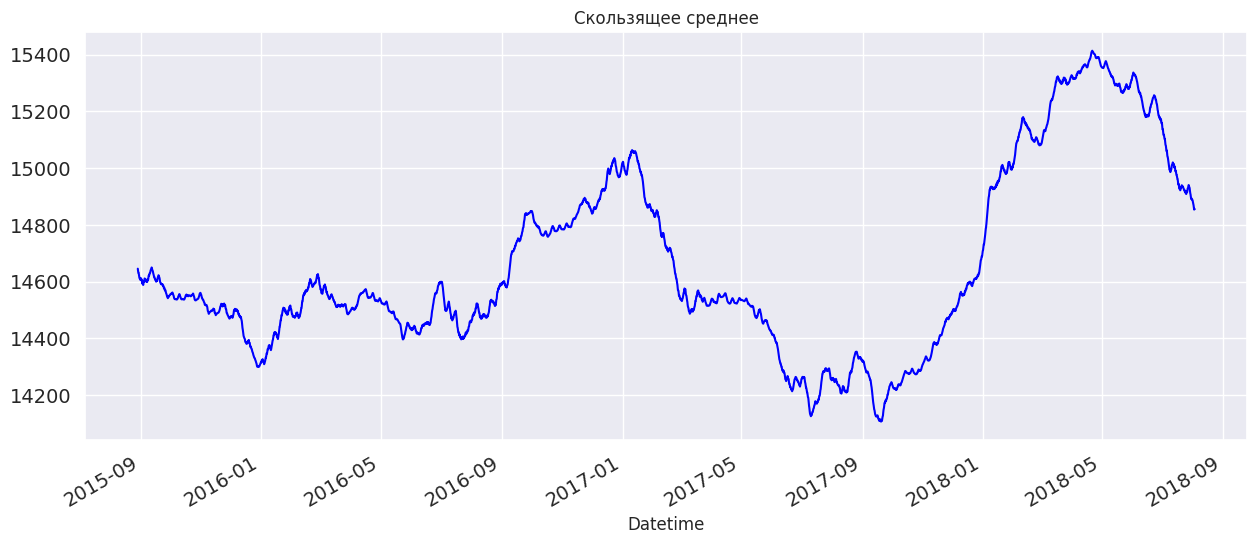

In [ ]:
MA = df.AEP_MW.rolling(window=24*30*6).mean()
MA.plot( figsize=(15,6),title= 'Скользящее среднее', fontsize=14, color="blue")
plt.show()

Теперь мы уберём из исходного ряда найденный тренд.


Потихоньку удаляем компоненты ряда, которые мы уже нашли. В зависимости от того, с каким рядом имеем дело, делим или вычитаем его части. MA - убирем тренд, детрендирование.

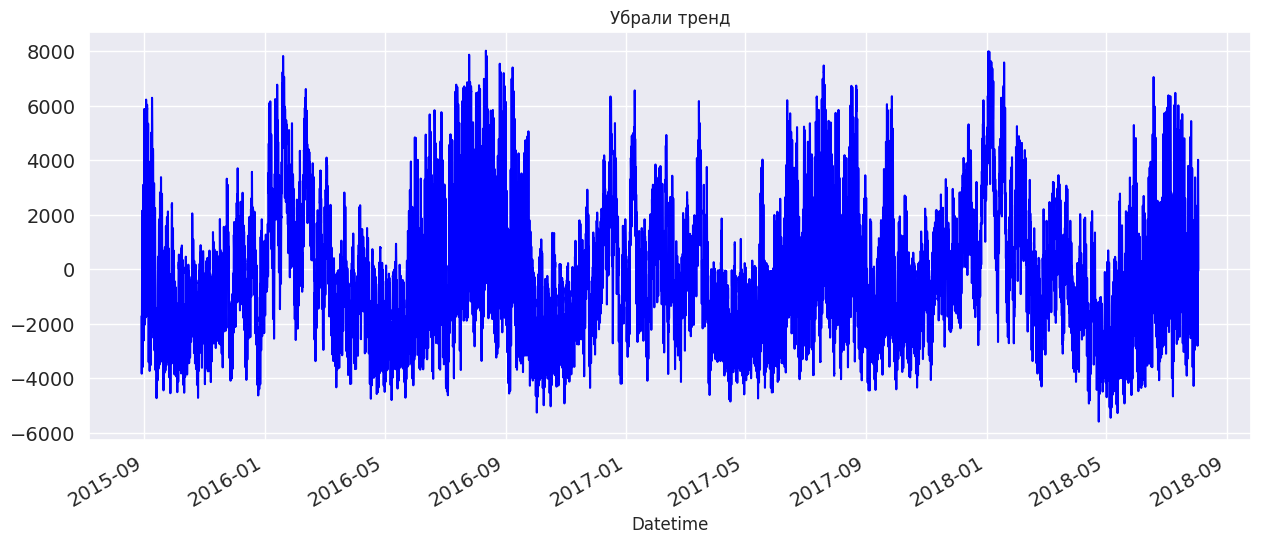

In [ ]:
detrend_ = df.AEP_MW - MA
detrend_.plot( figsize=(15,6),title= 'Убрали тренд', fontsize=14, color="blue")
plt.show()

Нормализуем по дням сезона. Для простоты реализации воспользуемся функцией `pd.core.nanops.pd_nanmean`, эта функция позволит нам не думать о пропусках в данных, автоматически корректно их обработать.

In [ ]:
from pandas.core.nanops import nanmean as pd_nanmean

def season_mean(x, period):
    """
    Return means for each period in x. period is an int that gives the
    number of periods per cycle. E.g., 12 for monthly. NaNs are ignored
    in the mean.
    """
    return np.array([pd_nanmean(x[i::period], axis=0) for i in range(period)])

В половине года 4320 часов. У каждого часа есть свой индекс $i$ - это позиция, которую данный час занимает от начала своего полугодия. На предыдущей картинке была четко заметна сезональность, однако влияние случайных выбросов также довольно велико. Давайте избавимся от них, взяв среднее значение каждого $i$-го часа **по полугодиям**.

То есть, если обозначить за $x_i^j$ $i$-й час $j$-го полугодия, а за $Y$ - количество рассматриваемых полугодий, мы посчитаем такие значения:

$$\bar x_i = \frac{1}{Y}∑\limits_{j=1}^Yx_i^j$$



In [ ]:
# Вычисляем среднее по сезону
# Центрируем
s_a = season_mean(detrend_, 24 * 30 * 6)
s_a -= np.mean(s_a, axis=0)

nobs = detrend_.shape[0]
seasonal = np.tile(s_a.T, nobs // 24*30*6 + 1).T[:nobs]

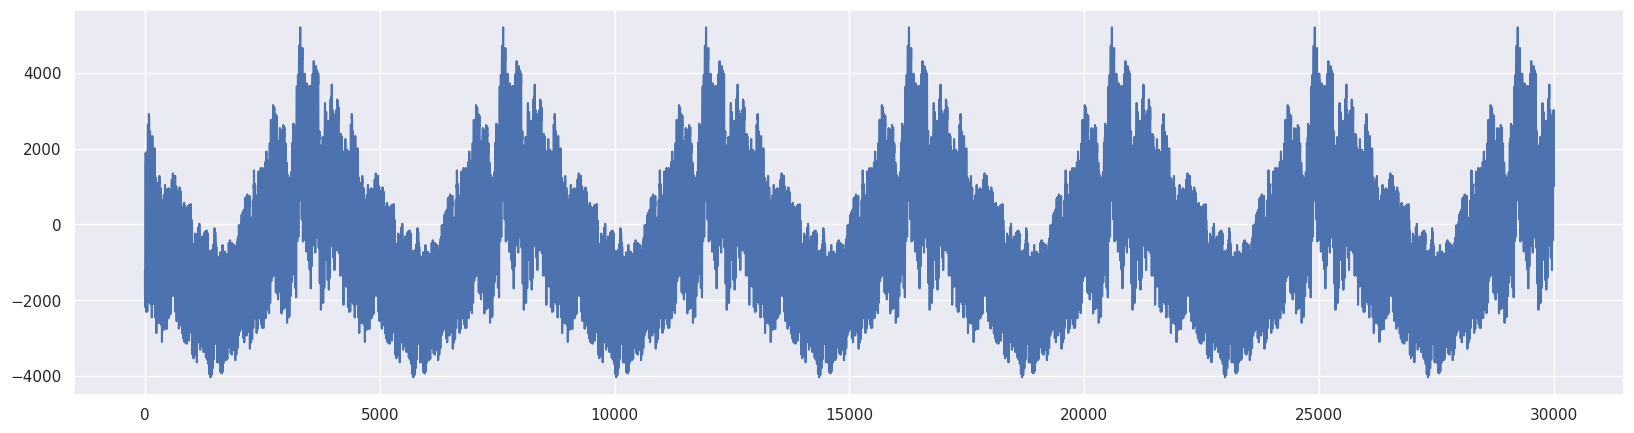

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(seasonal)
plt.show()

И рассмотрим остатки.

In [ ]:
residuals = df.AEP_MW - MA - seasonal

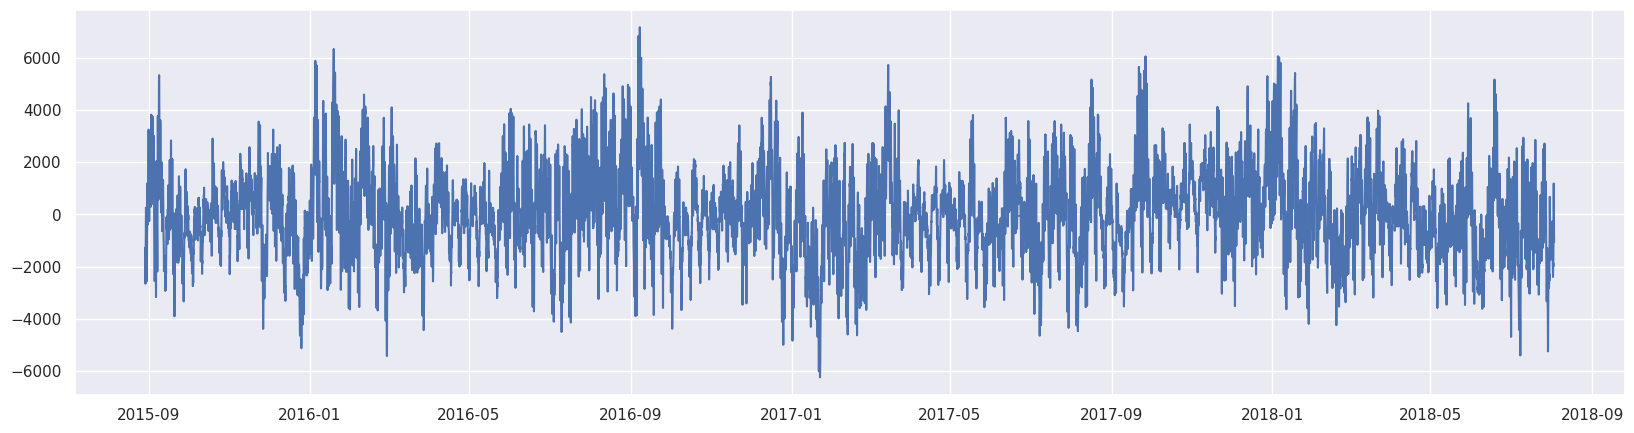

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(residuals)
plt.show()

Таким образом, мы получили разложение изначального ряда в три компоненты. Можем проверить, что сумма этих компонент действительно даёт нам исходный ряд.

Text(0.5, 1.0, 'Исходный ряд')

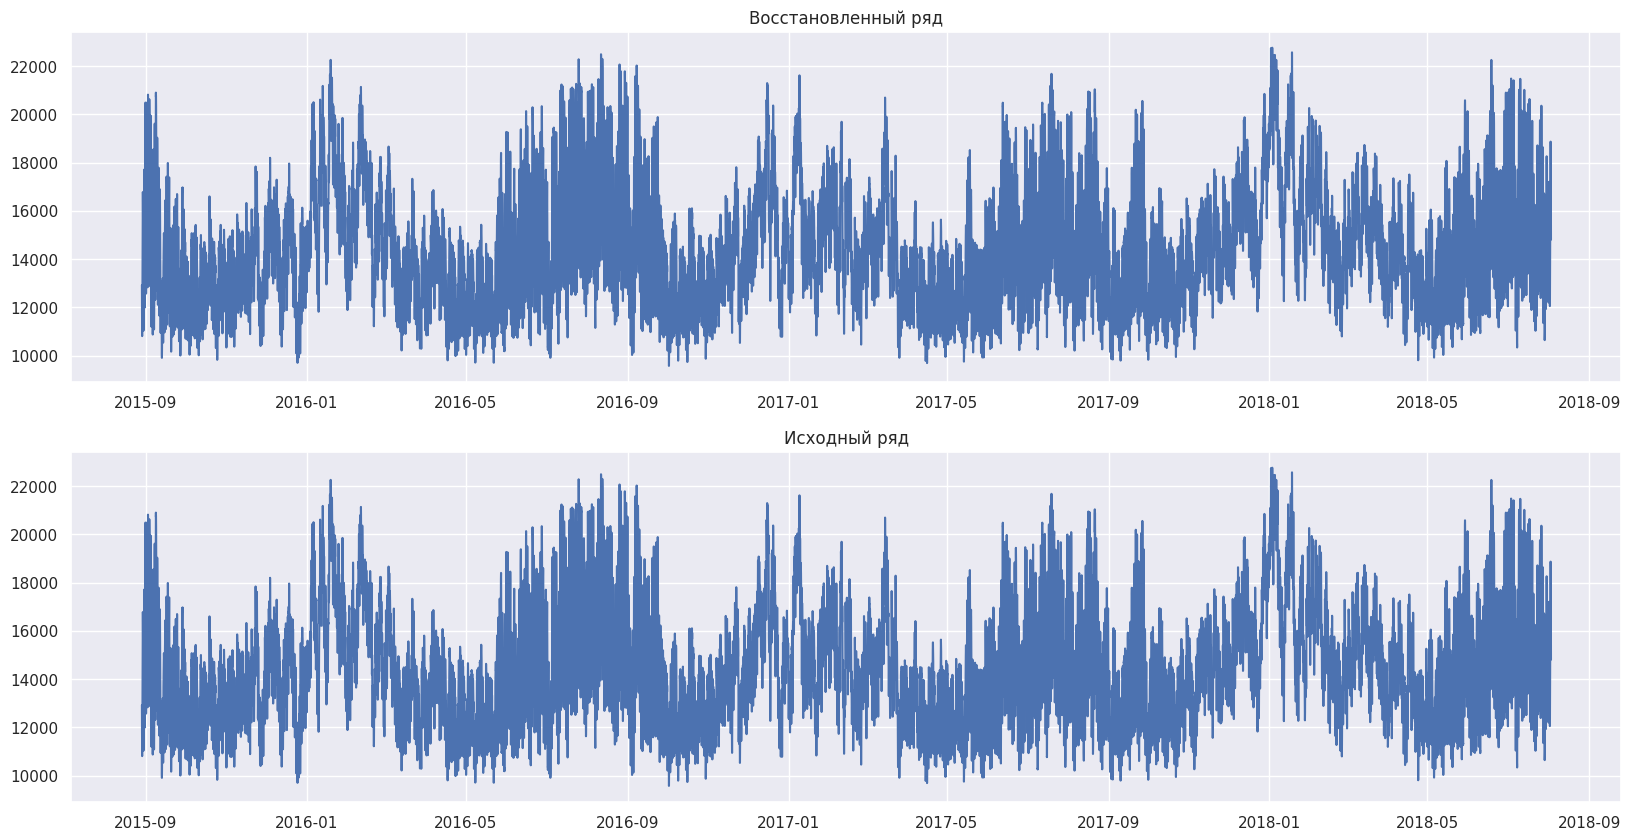

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

ax[0].plot(MA + residuals + seasonal)
ax[0].set_title('Восстановленный ряд')
ax[1].plot(df.AEP_MW[MA.dropna().index[0]:])
ax[1].set_title('Исходный ряд')


# Стационарные временные ряды

## Простейшие описательные статистики

Описание временных рядов в самом полном смысле может быть довольно сложной задачей. Для её решения нам нужны математические инструменты. В качестве таких инструментов часто используются следующие величины:

* Для описания ряда часто полезным может быть **математическое ожидание** - среднее значение всех элементов ряда до текущего момента времени $t$:

$$\bar x=\frac{1}{t}\sum_{i=1}^tx_i$$

* $D[x_t]$ - **дисперсия** (разброс) ряда в момент времени t. Она задаётся формулой:

$$D[x_t]=\frac{1}{t-1}\sum_{i=1}^{t}(x_i- \bar x)^2$$

* Также полезна так называемая **автоковариационная функция**, связывающая значения ряда в момент времени $t$ с историческим значением в момент времени $s$. Автоковариация  задаётся формулой:

$$c(s, t)=c(k=|t-s|)=\frac{1}{t-k}\sum_{i=1}^{t-k}(x_i- \bar x)(x_{i+k}- \bar x)$$

* Также полезна формула **автокорелляции**, которая определяет характер зависимости значения ряда в момент времени $t$ со значением в момент времени $s$:

$$acf(s, t)=\frac{c(s, t)}{\sqrt{D[x_s]}*\sqrt{D[x_t]}}$$



## Автокорелляция. Графики ACF и PACF.

Анализируя формулу для автокорелляции можно понять, что эта функция возвращает числа в сегменте $[-1; 1]$. При этом, можно утверждать, что чем больше значение модуля $acf(s, t)$, тем сильнее *линейная зависимость* между $x_t$ и $x_s$.

Чтобы понять, как зависит значение $x_t$ от своих "соседей", можно построить графики значений $acf(s, t)$ для разных $t$.

**Определение.** Функция $l_{Δt}(x_t) = x_{t - Δt}$ называется задержкой или **лагом** длины $Δt$. Эта функция возвращает нам $t$-того левого соседа наблюдения $x_t$. Лаги важны не только для описания характеристик временного ряда. Они также служат хорошими дополнительными признаками для моделей машинного обучения, когда мы рассматриваем задачи, ассоциированные с временными рядами.

Загрузим наш датасет еще раз.

In [ ]:
import pandas as pd


df = pd.read_csv('AEP_hourly.csv', sep =',', parse_dates=['Datetime'], index_col='Datetime')
df.sort_index(inplace=True)
df = df.iloc[-30000:]

Вновь обратимся к библиотеке `statsmodels`, но на этот раз воспользуемся функцией `statsmodels.graphics.tsaplots.plot_acf`, чтобы визуализировать корреляции с $j$-м соседом в рамках нашего ряда.

В приведённых ниже графиках по оси абсцисс отложены значения $j$, а по оси ординат - значения соответствующих этим длинам $j$ автокорреляций.

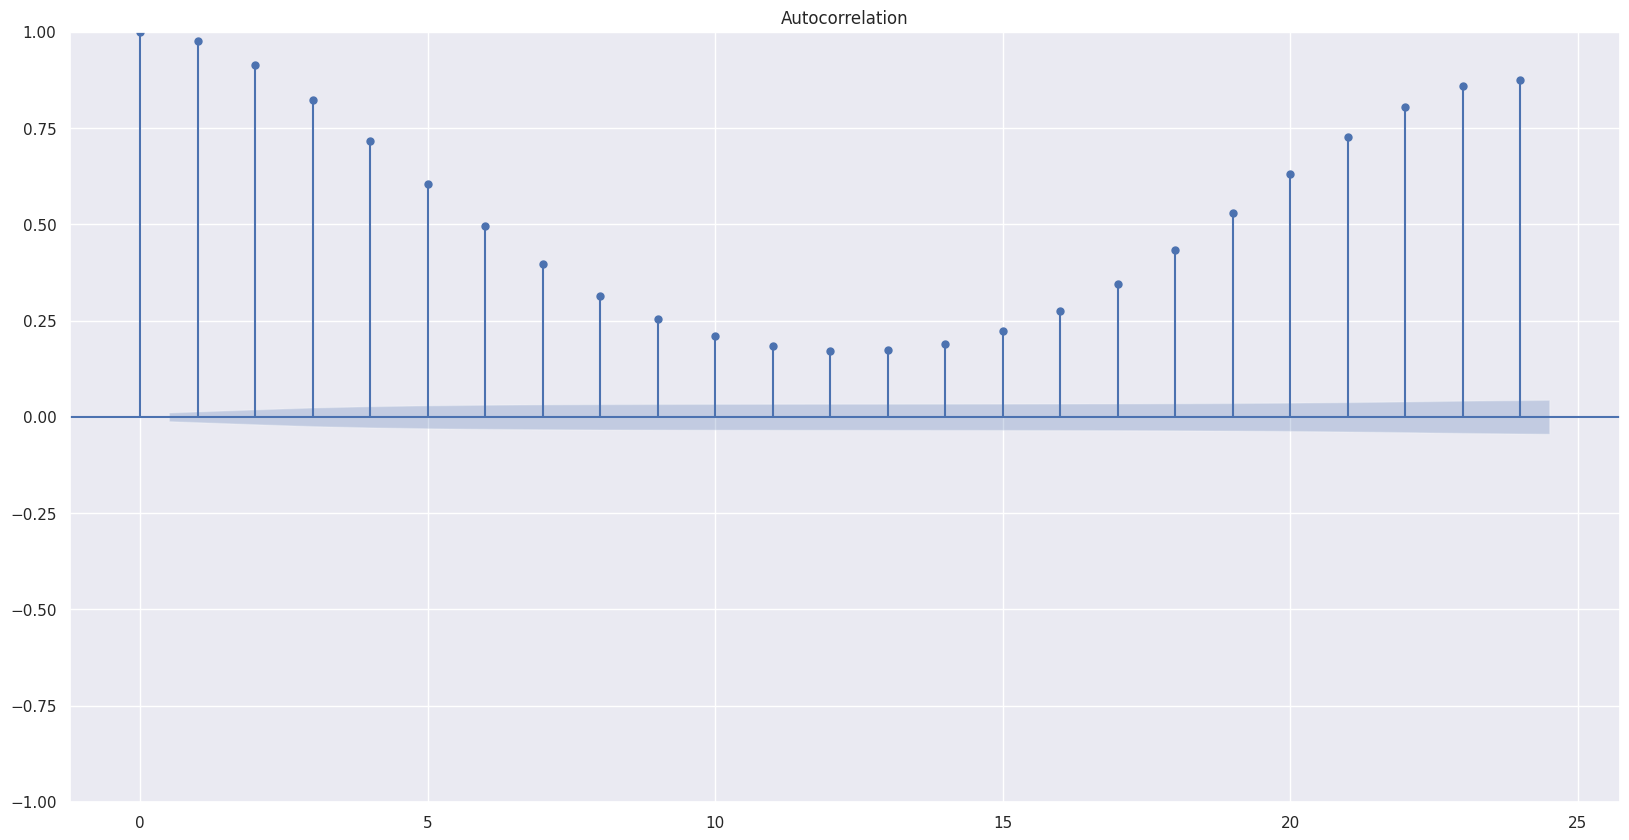

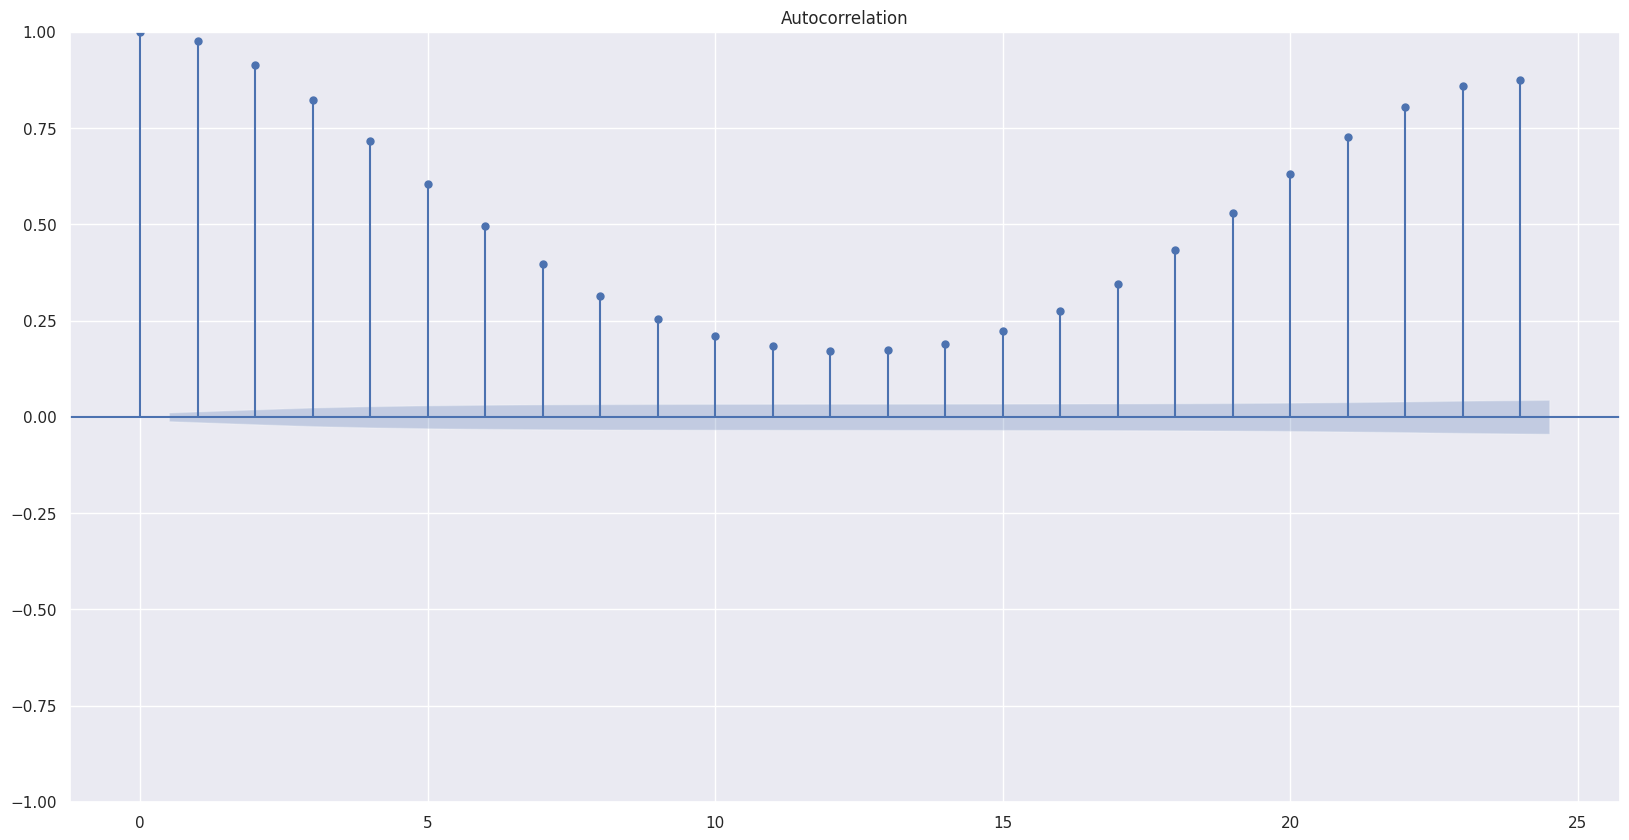

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["AEP_MW"].values, lags=24)

Мы видим, что зависимость от соседних значений велика, но она уменьшается со временем. Однако потом начинает возрастать - это говорит о том, что в данных присутствует цикличность.

Такой подход может, например, помочь нам выявлять определённую сезональность.

Второй важной функцией является **частичная автокорелляция** $pacf$. Она похожа на автокорелляцию, только зависимость между $x_t$ и $x_s$ оценивается **по остаткам** (т.е. после удаления влияния всех остальных лагов).

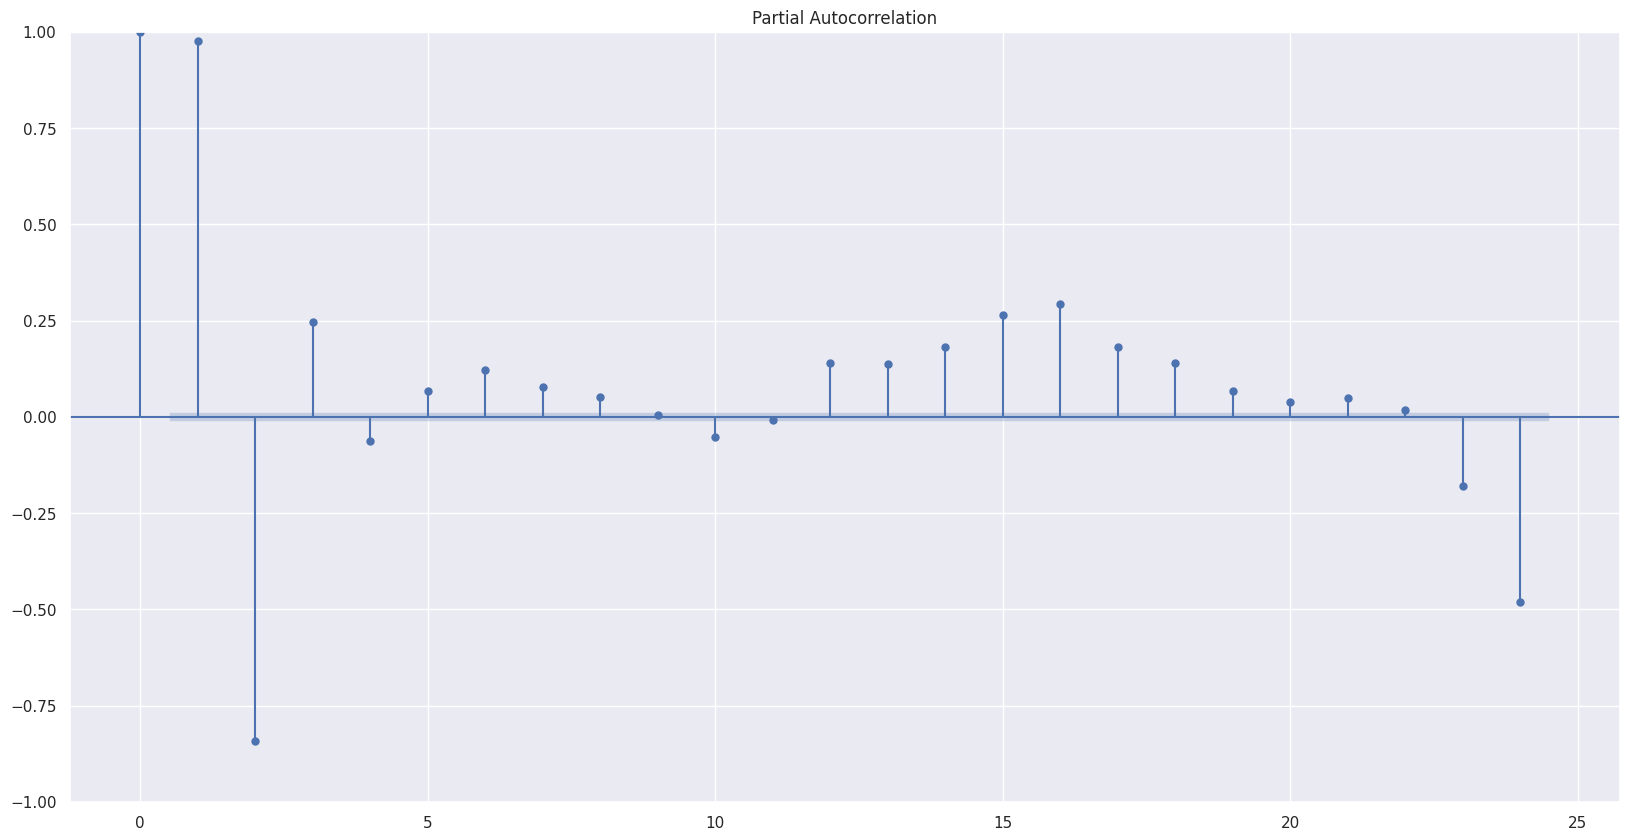

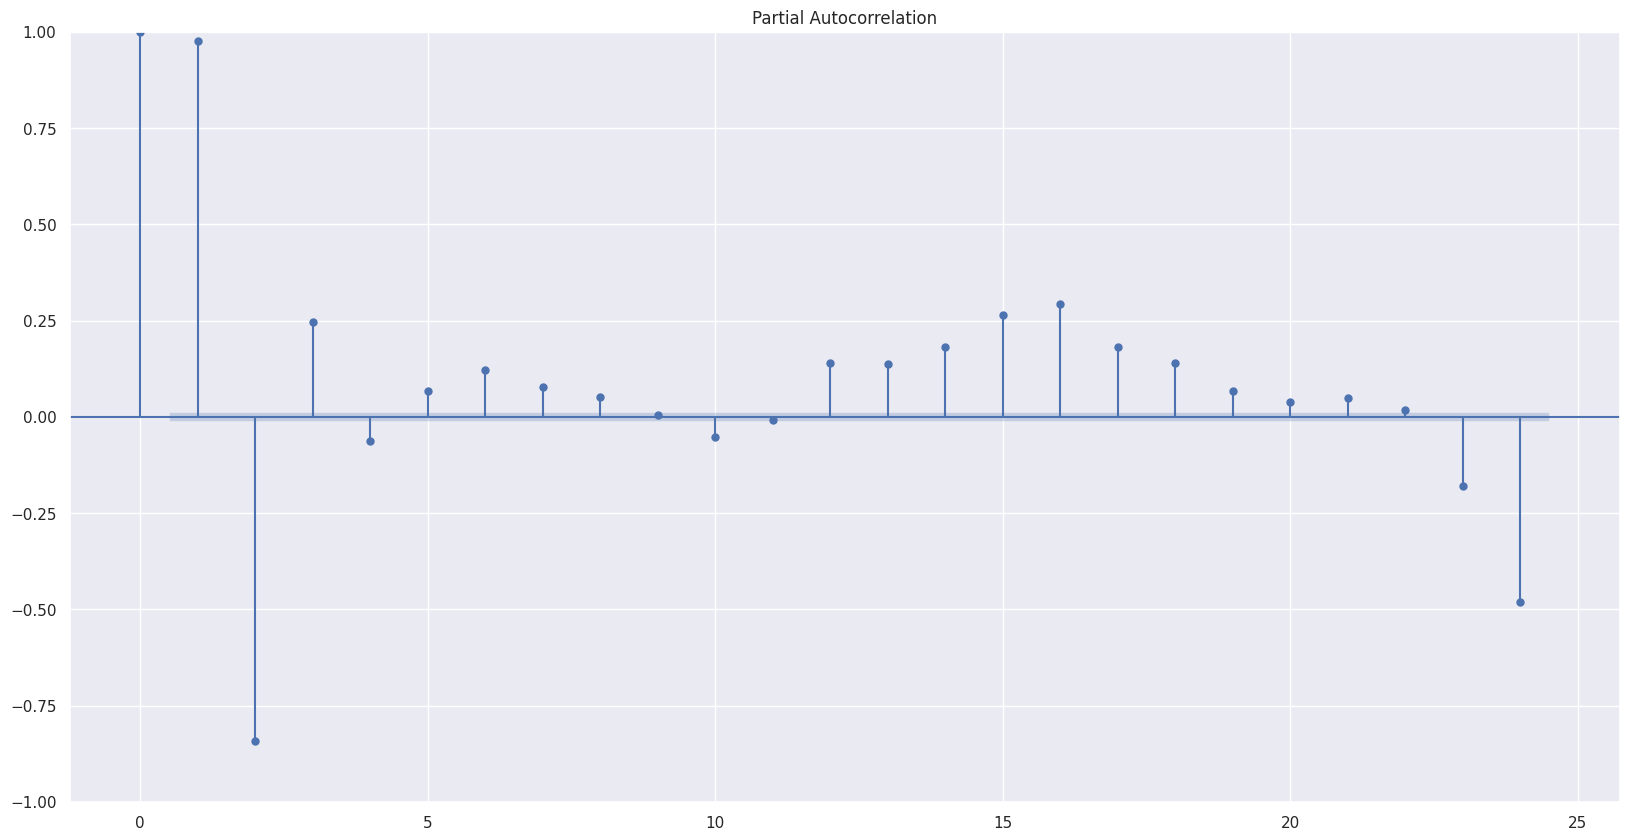

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df["AEP_MW"].values, lags=24)

Кстати говоря, какой будет функция автокорреляции от значения лага для белого шума?

Попробуем нарисовать её (на этот раз воспользуемся функцией `pd.plotting.autocorrelation_plot`, выполняющей ту же самую работу).

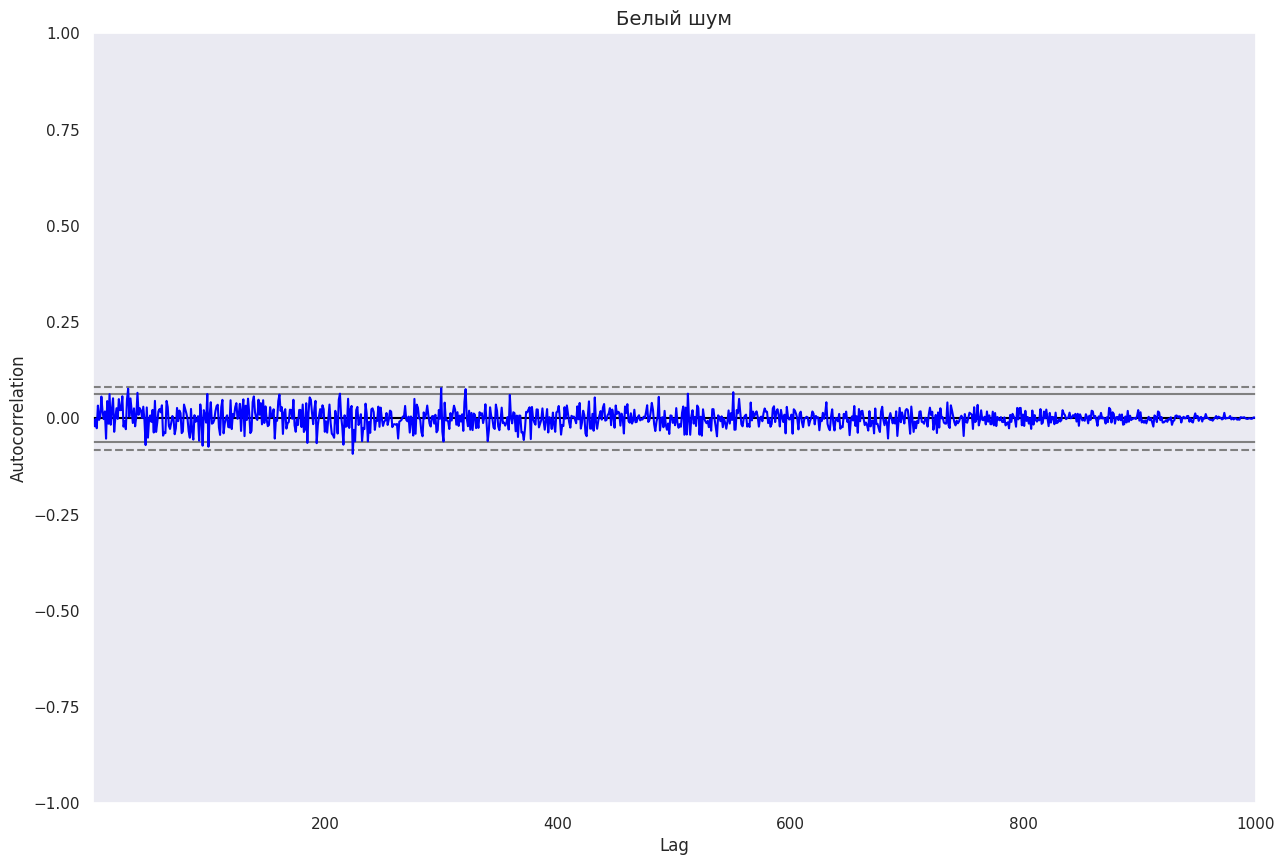

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (15, 10)

ax = pd.plotting.autocorrelation_plot(series, color = "blue")
ax.set_title('Белый шум', fontsize=14)
plt.show()

Абсолютно ожидаемый результат:

* Эта функция, во-первых, сама по себе случайная
* Разброс значений уменьшается со временем

## Стационарные ряды

Важной характеристикой временного ряда является его *стационарность*.

**Стационарный ряд** - ряд, у которого и математическое ожидание, и дисперсия являются *постоянными по времени*:

$$E[x_t]=μ=const, t=0, 1, 2, ...$$
$$D[x_t]=E(x_t-μ_t)^2=σ^2=const, t= 0, 1, 2, ...$$

Проще говоря, стационарный временной ряд **не имеет тренда**. Его характеристики постоянны во времени.

Многие модели ML и DL плохо применимы к нестационарным рядам. По этой причине на практике часто временные ряды искусственно остационаривают. Сделать это можно, например, вычтя из значений наблюдаемых величин тренд (условно - среднее значение).

## Простейшие модели стационарных временных рядов. ARMA.


Рассмотрим простейшую модель стационарного временного ряда, в котором нет компонент тренда, сезонности и аномалий (только стационарная часть).

Такой ряд может быть представлен формулой:

$$x_t = u_t + eps_t$$

Как мы видим, в формуле для значений ряда присутствует так называемая *случайная ошибка* $eps$ - эта величина не прогнозируема, но в процессе построения модели временного ряда ее нужно минимизировать. Мы не будем углубляться в математическую статистику и исследовать природу этой компоненты.

Поскольку мы рассматриваем простейший пример стационарного ряда, будем считать, что зависимости от времени **нет**. Значения ряда могут зависеть только от *значений временного ряда в предыдущие моменты времени*, т.е. от так называемых **лагов**. При этом будем считать, что эта зависимость **линейна**.

Поскольку, в нашем ряду присутствует всего 2 компоненты (основная часть и ошибка), можно выделить 3 основных модели стационарных рядов:

1. **MA(q)** - модель скользящего среднего (зависимость только от ошибок на q лагах).
2. **AR(p)** - модель авторегрессии (зависимость от основной части ряда на p лагах).
3. **ARMA(p, q)** - составная модель (зависимость от ошибок на q лагах и от основной части на p лагах).

### Идентификация AR и MA моделей.

Чтобы различать AR и MA модели используют известные графики функций $acf$ и $pacf$.

Модель AR(p) - модель авторегрессии, где нет зависимости от остатков, но сильно прослеживается зависимость от предыдущих значений. При этом, эта зависимость постепенно угасает с течением времени. Поэтому, в таких моделях график $acf$ не очень интересен. Интересен график $pacf$ - он представляет собой функцию, которая меняется до определённого значения p, а потом становится практически равной 0. Это связано с тем, что после удаления остатков для лага p мы полностью избавляемся от влияния лагов. Для определения конкретного p нужно определить какое-то минимальное значение b - порог. И как только значение $pacf(p)$ станет ниже этого порога - в этом моменте и можно определять p.

Модель MA(q) же представляет собой зависимость от остатков. Поэтому здесь интересно смотреть на функцию $acf$, которая будет затухать, пока в лаге q не достигнет заданного порогового значения.

Таким образом, можно схематически изобразить графики $acf$ и $pacf$ для моделей AR(p) и MA(q):

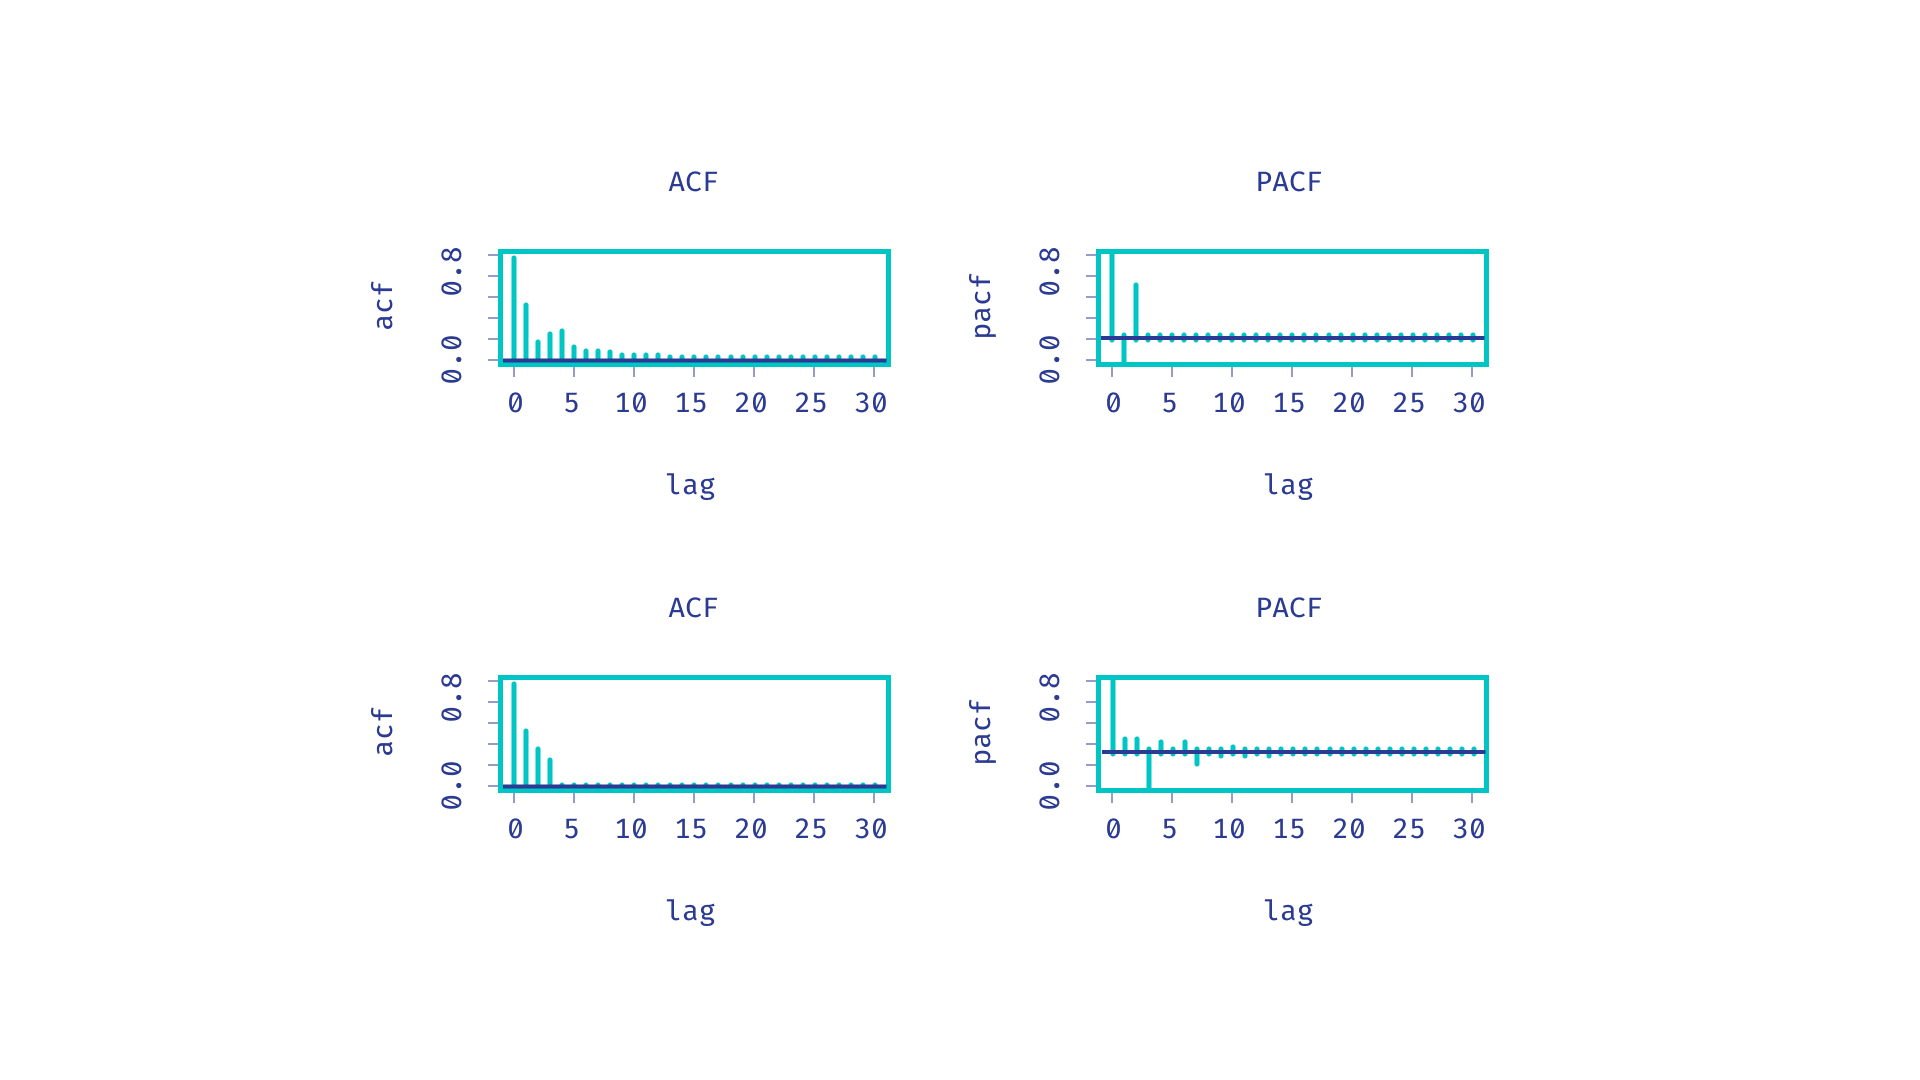

## Критерии стационарности. Тест Дики-Фуллера.

Мы узнали, что такое стационарный ряд и увидели примеры рядов. Но как понять, что рассматриваемый ряд - стационарен?

Первое, что приходит в голову - внимательно посмотреть на график ряда и визуально понять, что тренд отсутствует:

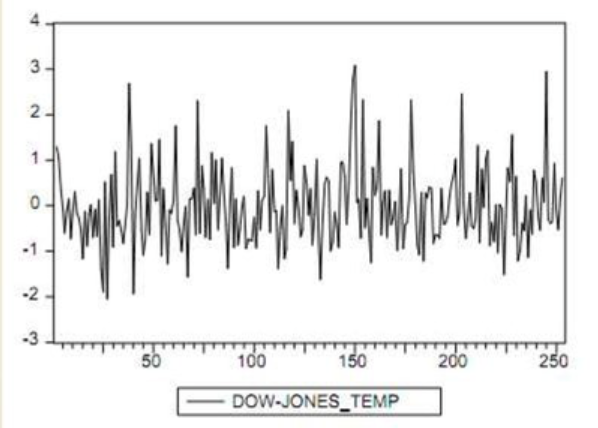


Однако, далеко не всегда тренд легко виден на графике. В общем случае, он может представлять компоненту, изменение которой очень сложно (с большим периодом и, возможно, даже циклично):

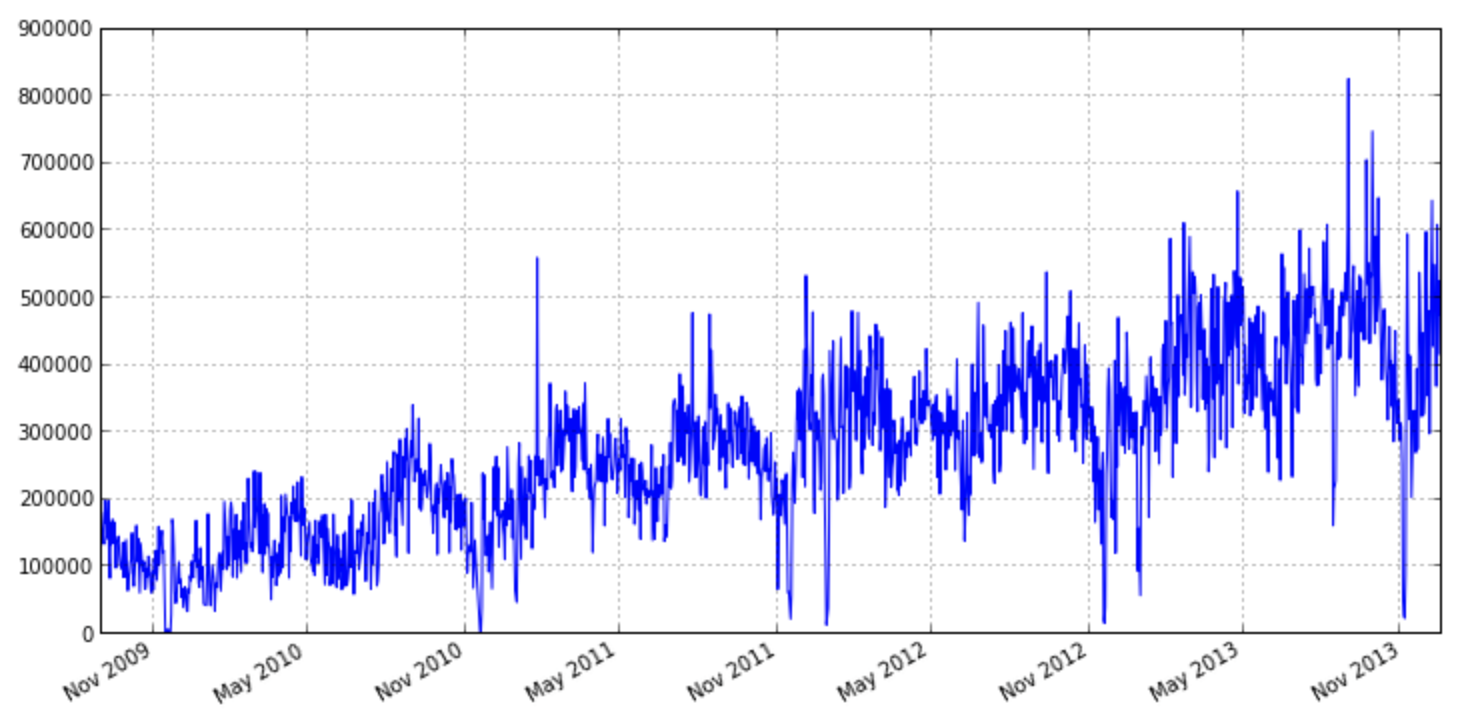

Поэтому, были разработаны специальные **тесты**, позволяющие проверить, является ли рассматриваемый ряд стационарным. Чаще всего используется так называемый **тест Дики-Фуллера (ADH-тест)**, который основан на проверке статистической гипотезы о том, что разница $x_t-x_{t-1}$ представляет собой *стационарный ряд*.

Для выполнения ADH-теста можно использовать функцию `addfuller` пакета `statsmodels.tsa.stattools` языка Python:

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 24, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.show()

    #Perform Dickey-Fuller test:
    # p-value
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

In [ ]:
sample_data = df.AEP_MW[-1000:]

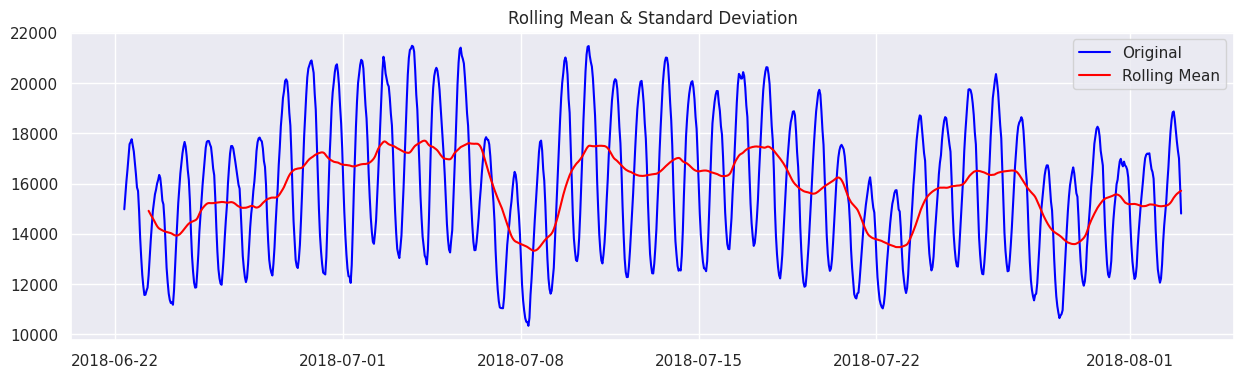

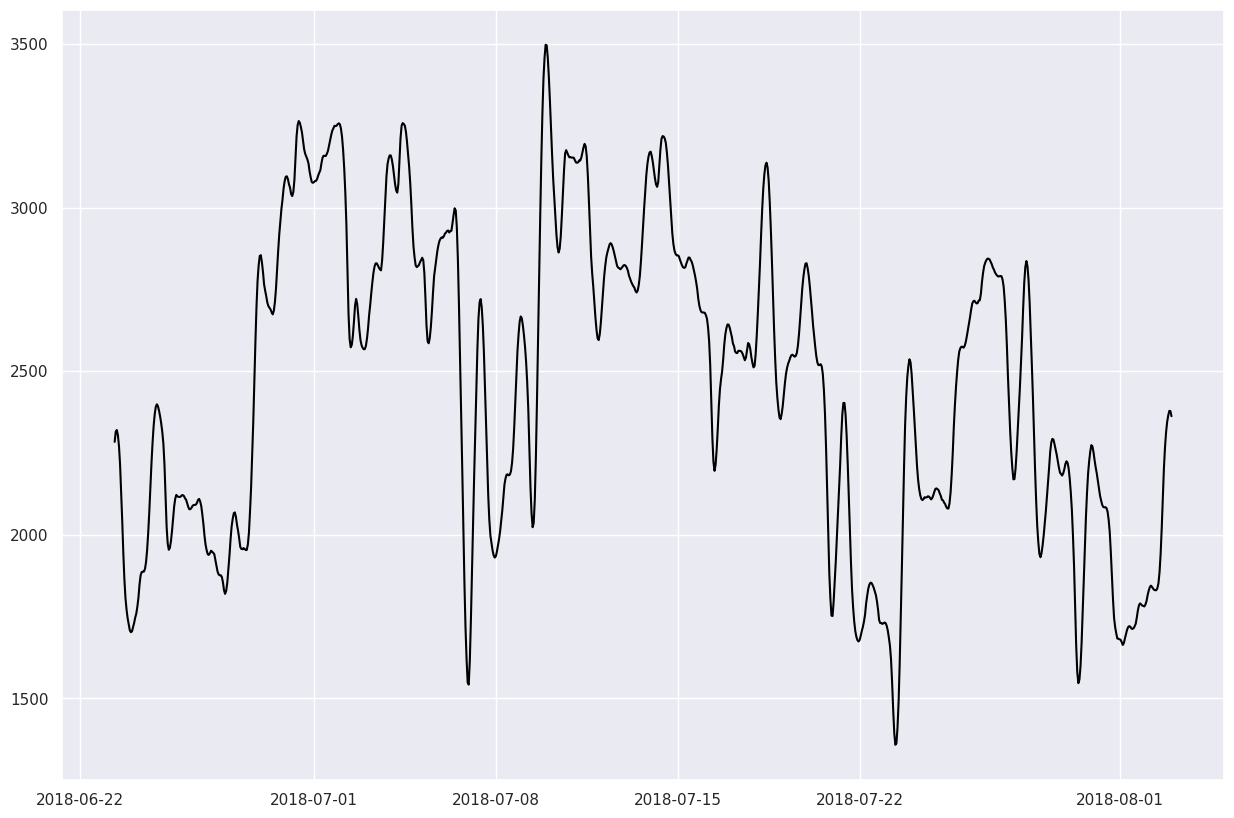

Results of Dickey-Fuller Test:
p-value = 0.0894. The series is likely non-stationary.
Test Statistic                  -2.617696
p-value                          0.089395
#Lags Used                      22.000000
Number of Observations Used    977.000000
Critical Value (1%)             -3.437061
Critical Value (5%)             -2.864503
Critical Value (10%)            -2.568348
dtype: float64


In [ ]:
test_stationarity(sample_data)

Временной ряд нестационарен.

Подходы для того чтобы сделать временной ряд стационарным:
- в случае непостоянства дисперсии - логарифмирование либо преобразование Бокса-Кокса (преобразование временного ряда..., например, логарифмирование вр. ряда);
- почти всегда помогает дифференцирование (переход к попарным разностям ряда): стабилизирует среднее значение ряда, может применяться неоднократно, выделяют также сезонное дифференцирование - попарная разность по сезонам.



## Приведение ряда к стационарному.

Очень полезной задачей при анализе временных рядов становится задача приведения произвольного временного ряда к стационарному.

1. Оценка стационарности ряда визуально или с помощью ADH-теста. Если ряд стационарен - конец.
2. Если ряд нестационарен - применение одного из алгоритмов избавления от нестационарности (декомпозиция с отбрасыванием нестационарных частей - см. выше).
3. Выполнение шагов 1-3 для нового ряда.

## Зачем нужно приводить ряд к стационарному?

Понимание особенностей построения временных рядов позволяет нам успешно решать такую важную задачу, как задача **прогнозирования** последующих значений. Она может применяться для предсказания погоды, курса валют и других значений, представимых в виде временного ряда.

Основные модели предсказания рядов основаны на линейной регрессии (в нашем случае - на авторегрессии в модели ARMA). Как известно, важным требованием к переменным в регрессии является их независимость друг от друга.

В случае временных рядов, независимость означает стационарность рассматриваемого ряда. Поэтому, для корректного построения предсказания необходимо преобразовывать ряд к стационарному.

# Прогнозирование временных рядов

**Задача** - предсказать потребление энергии на следующий день.

In [ ]:
w_hours = 24
train = df.iloc[:-w_hours] # вся выборка кроме последних 24 часа
val   = df.iloc[-w_hours:] # последние 24 часа

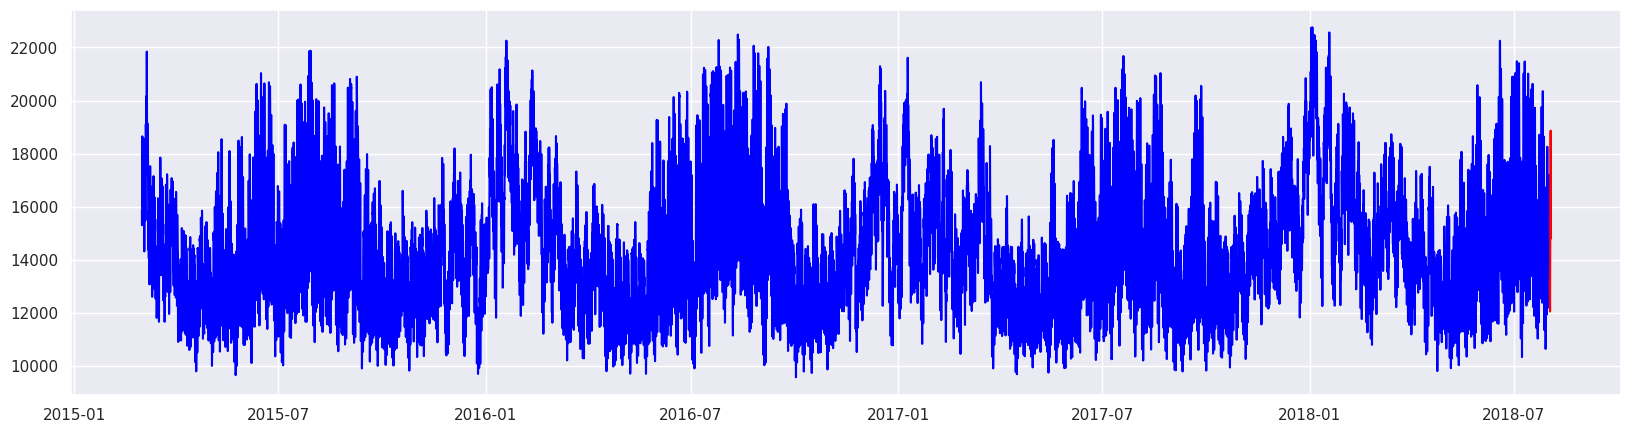

In [ ]:
plt.figure(figsize=(20, 5))

plt.plot(train.AEP_MW, color="blue")
plt.plot(val.AEP_MW, color="red")

plt.show()

## Baseline

Baseline - это некоторая простая (часто даже неадекватно примитивная) модель решения задачи, единственное предназначение которой - быть измерителем качества других моделей. То есть качество других моделей можно измерять относительно бейзлайна. Baseline - это наш градусник.


В качестве baseline будем брать среднее значение ряда, умноженное на количество часов.

In [ ]:
preds = [train.AEP_MW.mean()] * w_hours

### Оценка качества прогнозирования

Для оценки качества прогнозирования временных рядов возьмём 2 метрики:

* Известная нам из задач регрессии RMSE:

$$RMSE = \sqrt{\frac{\sum_{i=1}^{N}(Predicted_i - Actual_i) ^ 2}{N}}$$

* Относительная ошибка Mean Absolute Percentage Error:

$$MAPE = 100⋅\frac{1}{N}∑\limits_{i=1}^{N}|\frac{predicted_i - actual_i}{actual_i}|$$

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    return rmse

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('RMSE - ', rmse(val.AEP_MW, preds))
print('MAPE - ', mean_absolute_percentage_error(val.AEP_MW, preds))

RMSE -  2542.1243340173924
MAPE -  13.881442128007624


## Наивный подход

Наивный подход для прогнозирования временных рядов можно выразить при помощи фразы "Завтра = вчера"

${x}_{t} =  x_{t-n}$

Предсказание - завтра будет так же, как и вчера. Нужно всегда использовать в качестве одного из baseline при работе с временными рядами.

In [ ]:
preds = train.iloc[-w_hours:].AEP_MW.values

In [ ]:
print('RMSE - ', rmse(val.AEP_MW, preds))
print('MAPE - ', mean_absolute_percentage_error(val.AEP_MW,  preds))

RMSE -  838.5639262055895
MAPE -  3.8569350818642745


## Предсказание плавающим средним.
Новое значение будет вычисляться на основе среднего за конкретный период, предшествующий прогнозируемому значению.

$${x}_{t} = \frac{1}{k} \displaystyle\sum^{k-1}_{n=0} x_{t-n}$$

Оцениваем по последним N неделям. Усреднение дает генерилизацию, сглаживает аномалии. Можно не только среднее брать, а медиану и т.д. - все зависит от данных.

In [ ]:
n = 10
tr_sample = train.iloc[-n*w_hours:]
preds_arr = np.array(tr_sample.AEP_MW).reshape(n,-1)

preds = preds_arr.mean(axis = 0)

In [ ]:
print('RMSE - ', rmse(val.AEP_MW, preds))
print('MAPE - ', mean_absolute_percentage_error(val.AEP_MW,  preds))

RMSE -  430.80165099497935
MAPE -  2.261731940436


Заметим, что метрики стали уже намного лучше.

## Взвешенное среднее

$${x}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n x_{t-n}$$

Наблюдения за вчера несут больше информации, чем более старые наблюдения. Будем рассматривать линейную комбинацию последних наблюдений. Новые - с большим весом, более старые - с меньшим весом. Пока что выберем эти веса на глаз. Важное условие - веса должны суммироваться к единице.

In [ ]:
W = np.array([0.001, 0.004, 0.005, 0.01 , 0.02 , 0.05 , 0.1  , 0.15 , 0.26 , 0.4])
preds_arr_W = np.array([preds_arr[x]*W[x] for x in range(len(W))])
preds = preds_arr_W.sum(axis = 0)

Проверим суммируемость к 1:

In [ ]:
sum(W)

1.0

Веса можно на валидации подобрать.
Качество можно улучшить!

In [ ]:
print('RMSE - ', rmse(val.AEP_MW, preds))
print('MAPE - ', mean_absolute_percentage_error(val.AEP_MW,  preds))

RMSE -  853.2407205091653
MAPE -  4.057324648476928


## Экспоненциальное сглаживание

Для прогноза будем учитывать все наблюдения, при этом экспоненциально уменьшая веса по мере углубления в исторические данные (см. *экспоненциальное взвешенное среднее*).

$${L}_{t} = \alpha \cdot x_t + (1-\alpha) \cdot L_{t-1} $$

In [ ]:
# для прогноза значения берутся все наблюдения
# но при этом экспоненциально уменьшаем каждый вес по мере удаления в прошлое
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result[-1]

# alpha - на сколько сильно учитываем наблюдения за вчера
# если альфа очень мало, то наблюдение с большим весом за весь интервал будем учитывать
# если альфа большое - то забываем лучше

In [ ]:
#Простой пример
series_val = [1,2,3,4,5,6]
result = [series_val[0]]
#alpha - насколько сильно мы не хотим помнить, что было в прошлом
alpha = 0.9
# alpha = 0.1

for n in range(1, len(series_val)):
    print(series_val[n])
    result.append(alpha * series_val[n] + (1 - alpha) * result[n-1])

result[-1]

2
3
4
5
6


5.88889

Попробуем интуитивно понять, что за этим стоит, раскроем скобки:

$L_{t-1} $ - прогноз модели за прошлый период

$${L}_{t} = \alpha \cdot x_t + L_{t-1}-\alpha L_{t-1} $$

$${L}_{t} = L_{t-1} + \alpha ( x_t - L_{t-1}) → {L}_{t} = L_{t-1} + \alpha e_t $$

То есть мы строим свой прогноз как бы учитывая ошибку, которую мы сделали на предыдущем шаге.

Две крайности:
- $ \alpha = 0 →$  прогноз - просто среднее

- $ \alpha = 1 →$ наивное предсказание

### Тройное экспоненциальное сглаживание

При помощи экспоненциального сглаживания можно научиться извлекать компоненты временного ряда следующим образом:

- уравнение тренда    
${F}_{tT} = \beta \cdot (L_t - L_{t-1}) + (1-\beta)T_{t-1} $

- уравнение уровня    
${F}_{tL} = \alpha \cdot Y_t/(S_{t-M}) + (1-\alpha) \cdot (L_{t-1} + T_{t-1}) $

- уравнение сезонности    
${F}_{tS} = \gamma \cdot Y_t/(L_t) + (1-\gamma) \cdot (S_{t-M}) $


Попробуем предсказать потребление энергии за последнюю неделю, отделим train и test.

In [ ]:
# учитываем уровень, тренд, и сезон
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train.AEP_MW), seasonal_periods=24, trend='add', seasonal='add',).fit()
forecast = pd.Series(fit1.forecast(len(val)))
forecast.index = val.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
print('RMSE - ', rmse(val.AEP_MW, forecast))
print('MAPE - ', mean_absolute_percentage_error(val.AEP_MW, forecast))

RMSE -  889.6396465814722
MAPE -  4.878301391039313


## Валидация

Для валидации моделей временных рядов хотелось бы применить метод кросс-валидации. Стандартная кросс-валидация, однако, не может быть применена в задачах работы с временными рядами, ведь она никаким образом не учитывает обязательное свойство последовательности объектов. То есть в случае обычной кросс-валидации мы могли позволить себе взять тестовый фолд из начала выборки, а тренировочный - из конца, такой подход был корректным. Здесь же мы хотели бы научиться корректно обрабатывать данные с учётом времени их возникновения.

Вообще таких способов довольно много.
Сравнительно простой способ корректного разбиения временного ряда - использование функции `sklearn.model_selection.TimeSeriesSplit `.

Эта функция работает следующим образом: она разбивает временной ряд $x_t$ на последовательные пары тренировочных и тестовых фолдов. Пара, идущая под $i$-м номером представлена в следующем виде:
$$x_{0:(g⋅i)} → x_{(g⋅i + gap) : (g⋅i + gap + test\_size)}$$

В данном случае под $x_{i:j}$ подразумевается отрезок временного ряда с индексами от $i$ до $j$ $x_i, x_{i+1} ... x_j$, под $g$ имеется в виду инкремент, который вычисляется автоматически исходя из необходимого количества разбиений выборки в кросс-валидации, а $gap$ - это задержка между концом тренировочной и началом тестовой выборки.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
errors = []

tscv = TimeSeriesSplit(n_splits=4)

for train_idx, test_idx in tscv.split(df.AEP_MW):
    print('len_train - ', len(train_idx))
    print('len_test - ', len(test_idx))

    # Задаём модель
    model = ExponentialSmoothing(np.asarray(df.AEP_MW.iloc[train_idx]) ,seasonal_periods=24 , seasonal='add').fit()

    # Делаем предсказание
    forecast = pd.Series(model.forecast(len(test_idx)))

    # Считаем ошибку
    actual = df.AEP_MW.iloc[test_idx]
    error = rmse(actual.values, forecast.values)
    errors.append(error)

len_train -  6000
len_test -  6000
len_train -  12000
len_test -  6000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


len_train -  18000
len_test -  6000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


len_train -  24000
len_test -  6000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
errors

[2424.841598748371, 3030.2447023008885, 2277.929324798101, 3742.3436013429346]

In [ ]:
np.mean(errors)

2868.8398067975736

# ARIMA*

Одной из самых популярных моделей прогнозирования временных рядов, безусловно, является **ARIMA**.

**ARIMA** - AR (Авторегрессия) + I(Интегрирование) + MA(Скользящее среднее).

ARIMA - это применение модели ARMA, которую мы рассмотрели ранее, к **приращениям** исходного временного ряда. То есть вместо исходного временного ряда $x_1, x_2 ... x_T$ рассматривается ряд $d_1 = x_2 - x_1, d_2 = x_3 - x_2 ...$

Формирование прогноза для ряда $d_1, d_2 ...$ приводит нас к прогнозу для ряда $x_1, x_2 ...$, ведь $\hat{x}_i = d_1 + d_2 + ... + d_{i-1} =\hat{x}_{i-1} + d_{i-1}$.

Именно отсюда берется символ $I$ в названии модели: для получения прогноза по исходному ряду мы интегрируем прогнозируемые приращения.

Модель ARIMA реализована в модуле `statsmodels.tsa.arima.model.ARIMA`.

Для её использования необходимо задать 2 параметра:

* `endog` - непосредственно временной ряд
* `order: (p, d, q)` - набор констант, характеризующих поведение модели. Здесь p - порядок модели авторегрессии (то есть максимальный лаг), d - параметр дифференцирования временного ряда (то есть максимальный порядок разности при формировании ряда $d_1 ... $, ведь мы также можем рассмотреть ряд $d_2 - d_1, d_3 - d_2$ и т.д.), а параметр q - длина окна сглаживания.

In [ ]:
mod = sm.tsa.arima.ARIMA(val.AEP_MW, order=(1, 0, 0))
res = mod.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 AEP_MW   No. Observations:                   24
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -187.947
Date:                Wed, 03 May 2023   AIC                            381.895
Time:                        11:03:30   BIC                            385.429
Sample:                    08-02-2018   HQIC                           382.833
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.464e+04   2347.529      6.237      0.000       1e+04    1.92e+04
ar.L1          0.9560      0.065     14.639      0.000       0.828       1.084
sigma2      3.351e+05    1.5e+05      2.233      0.026     4.1e+04    6.29e+05
===================================================================================
Ljung-Box (L1) (Q):                  16.73   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.00   Prob(JB):                         0.46
Heteroskedasticity (H):               1.07   Skew:                            -0.40
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

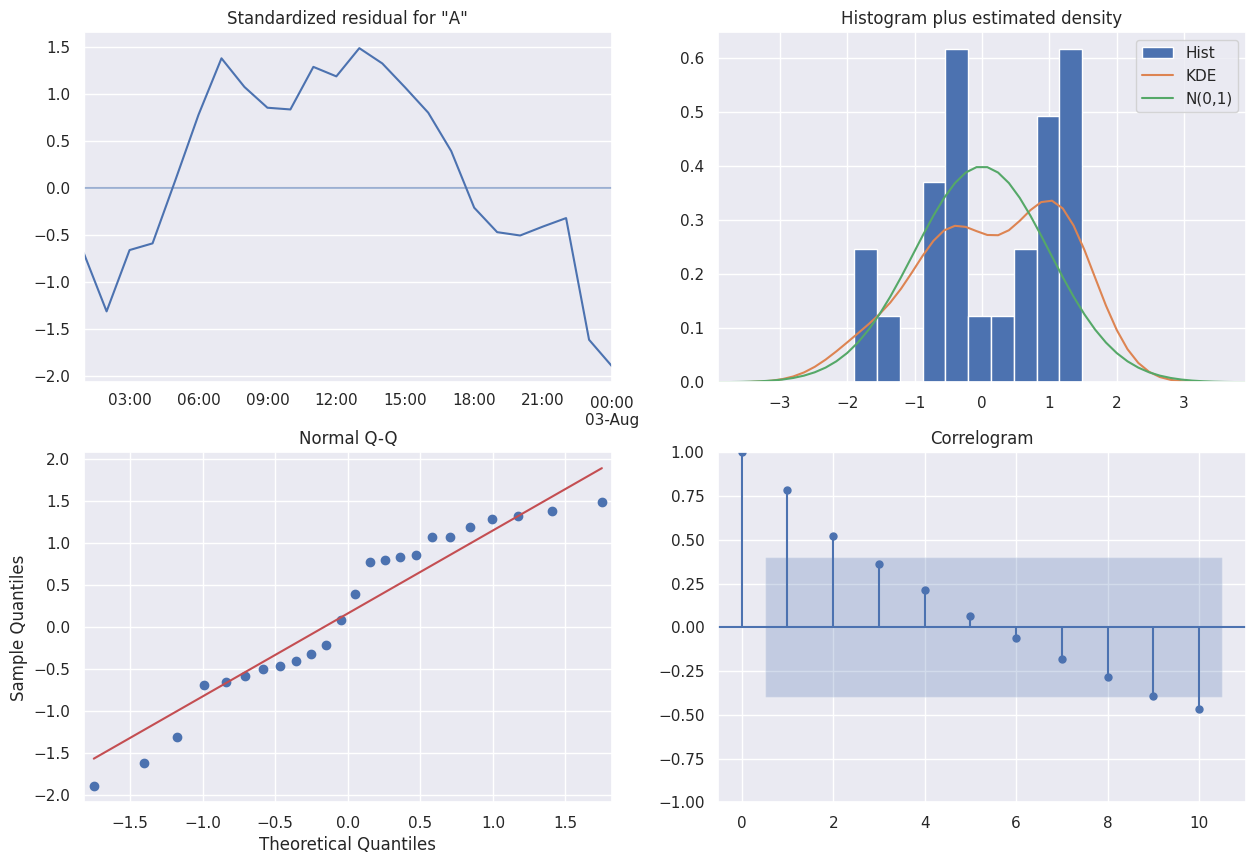

In [ ]:
res.plot_diagnostics(figsize=(15, 10))
plt.show()

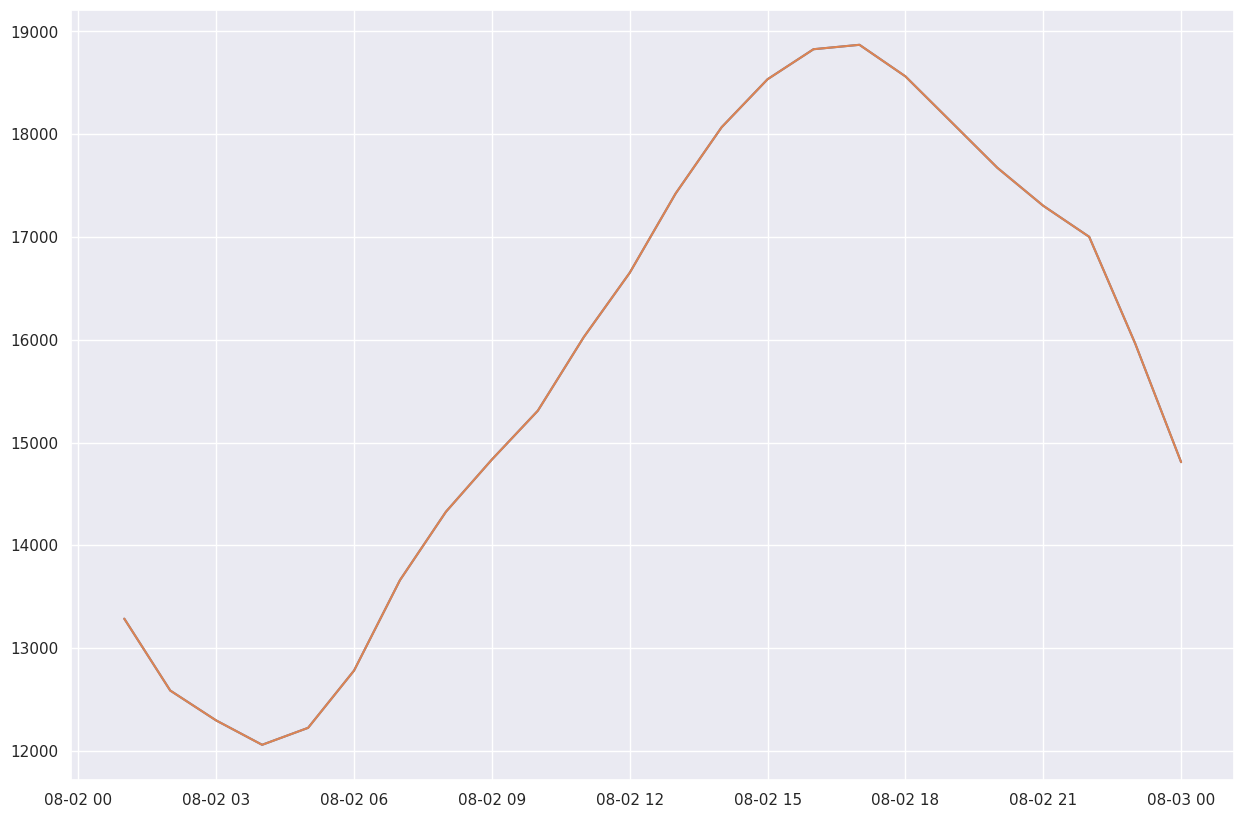

In [ ]:
preds = res.predict(dynamic=False)
plt.plot(val.AEP_MW)
plt.plot(val)

In [ ]:
print('RMSE - ', rmse(val.AEP_MW, preds))

RMSE -  636.4660065076778


Результат неплохой. Но, вообще говоря, мы можем перебрать много различных параметров ARIMA и улучшить его.

In [ ]:
import itertools
import warnings
import tqdm
from tqdm.auto import tqdm
warnings.filterwarnings("ignore")

p = range(0,10)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
best_params = (0,0,0)
best_rmse = np.inf

for params in tqdm(pdq):
  model_test = sm.tsa.arima.ARIMA(val.AEP_MW, order = params)
  result_test = model_test.fit()
  preds = result_test.predict(dynamic=False)

  rmse_ = rmse(val.AEP_MW, preds)
  if rmse_ < best_rmse:
    best_params = params
    best_rmse = rmse_
print(best_params, best_rmse)

  0%|          | 0/90 [00:00<?, ?it/s]

(1, 0, 1) 493.153097183977


ARIMA дает хороший результат, если есть много времени для анализа: можно все настроить на валидации и получить хорошую точность.

Но на практике ARIMA долго работает как раз из-за перебора параметров.

ARIMA дает возможность сгенерировать новые фичи.